<a href="https://colab.research.google.com/github/manish021996/Bike_Sharing_Demand_Prediction/blob/main/Capstone_Bike_Sharing_Demand_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Bike Sharing Demand Prediction**



### **Project Type**    - Regression
### **Contribution**    - Individual
### <u>**Name              - Manish H Magarde**


# **Project Summary -**

 The project involved building and evaluating different regression machine learning models for predicts the count of bike rentals, such as linear regression, Ridge regression, Lasso regression, ElasticNet regression, and RandomForest regression. The models were trained and evaluated using various metrics such as MSE, RMSE, R2, and Adjusted R2 on both the training and test datasets.

The RandomForest model demonstrated the best performance without overfitting, as it exhibited lower MSE and RMSE values, higher R2 values (Training dataset - 0.984354, test datasets - 0.895198) and high Adjusted R2 values (training datasets -0.894506 , test datasets - 0.892371) on both the training and test datasets.

RandomForest model is also explained with the help of shap library.

# **GitHub Link -**

https://github.com/manish021996/Bike_Sharing_Demand_Prediction

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
bike_df = pd.read_csv("/content/drive/MyDrive/Projects/SeoulBikeData.csv", encoding='latin')

### Dataset First View

In [4]:
# Dataset First Look - first 5 rows
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
#Last 5 row
bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)

### Dataset Information

In [7]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print('The numbers of duplicate values in datasets is: ', len(bike_df[bike_df.duplicated()]))

The numbers of duplicate values in datasets is:  0


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

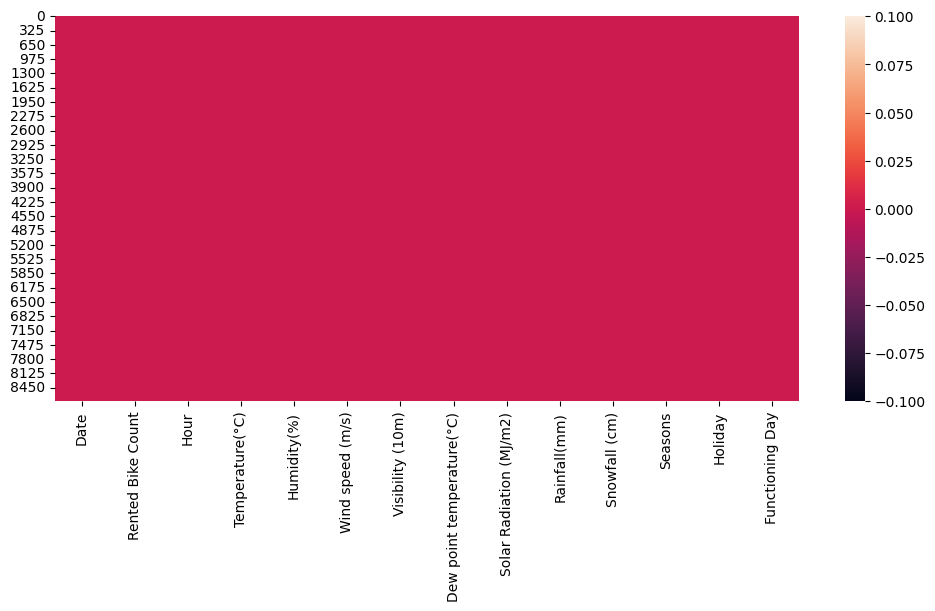

In [11]:
# Visualizing the missing values
plt.figure(figsize=(12,5))
sns.heatmap(bike_df.isnull())
plt.show()

### What did you know about your dataset?

1. The dataset we are working with is related to bike sharing demand, and our goal is to predict the number of bikes required per hour.
2. The dataset consists of 14 rows and 8760 columns.
3. Among these columns, 4 are of integer type, 4 are of object type, and 6 are of float type.
4. Certain columns need to be converted to different data types, such as 'children', 'agent', and 'company' to integer type, and 'Date' to datetime type.
5. There are no missing or null values in any of the columns.
6. There are no duplicate rows in the dataset.





## ***2. Understanding Your Variables***

In [115]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [116]:
# Dataset Describe - Description of numerical column
bike_df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

In [117]:
# Description of Object datatype columns
bike_df.describe(include = 'O').T

count unique         top  freq
Date             8760    365  01/12/2017    24
Seasons          8760      4      Spring  2208
Holiday          8760      2  No Holiday  8328
Functioning Day  8760      2         Yes  8465

### Variables Description

**Breakdown of Our Features:**

**Date** : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, **type : str**, we need to convert into **datetime format**.

**Rented Bike Count** : Number of rented bikes per hour which our **dependent variable** and we need to predict that, **type : int**

**Hour**: The hour of the day, starting from 0-23 it's in a digital time format, **type : int**, we need to convert it into **category data type**.

**Temperature(°C)**: Temperature in Celsius, **type : Float**

**Humidity(%)**: Humidity in the air in %, **type : int**

**Wind speed (m/s)** : Speed of the wind in m/s, **type : Float**

**Visibility (10m)**: Visibility in m, **type : int**

**Dew point temperature(°C)**: Temperature at the beggining of the day, **type : Float**

**Solar Radiation (MJ/m2)**: Sun contribution, **type : Float**

**Rainfall(mm)**: Amount of raining in mm, **type : Float**

**Snowfall (cm)**: Amount of snowing in cm, **type : Float**

**Seasons**: Season of the year, **type : str**, there are only 4 season's in data *.

**Holiday**: If the day  is holiday period or not, **type: str**

**Functioning Day**: If the day is a Functioning Day or not, **type : str**

### Check Unique Values for each variable.

In [118]:
# Check Unique Values for each variable.
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [119]:
# Converting datatype of date column from object to datetime
bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x,'%d/%m/%Y'))

In [120]:
# creating 2 new columns months and days from date columns
bike_df['Year'] = bike_df['Date'].dt.year
bike_df['Months'] = bike_df['Date'].dt.month
bike_df['Days'] = bike_df['Date'].dt.day_name()

In [121]:
# creating new colummn 'Weekdays-0/weekend-1' from days column where weekend days are code as 0 and weekdays are code as 1
bike_df['Weekdays-0/weekend-1'] = np.where(bike_df['Days'] == ('Saturday' or 'Sunday'), 1,0)

In [122]:
# Observing the values of new columns
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Year  Months    Days  Weekdays-0/weekend-1  
0             Yes  2017      12  Friday                     0  
1             Yes  2017      12  Friday                     0  
2             Yes  2017      12  Friday                     0  
3             Yes  2017      12  Friday                     0  
4             Yes  2017      12  Friday                     0

In [123]:
# rename some of the complex columns name for easy to use
bike_df.rename(columns = {'Rented Bike Count': 'Rented_Bike_count','Temperature(°C)' : 'Temperature', 'Humidity(%)':'Humidity', 'Wind speed (m/s)':'Wind_speed',
                          'Dew point temperature(°C)':'Dew_point_temperature','Solar Radiation (MJ/m2)':'Solar_radiation', 'Rainfall(mm)':'Rainfall',
                          'Visibility (10m)':'Visibility','Snowfall (cm)':'Snowfall', 'Functioning Day' : 'Functioning_day'}, inplace = True )

In [124]:
# Removing Unwanted columns from datasets
bike_df.drop(columns = ['Year','Date','Days'],inplace = True)

In [125]:
bike_df.head()

Rented_Bike_count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_day  Months  Weekdays-0/weekend-1  
0  No Holiday             Yes      12                     0  
1  No Holiday             Yes      12                     0  
2  No Holiday             Yes      12                     0  
3  No Holiday             Yes      12                     0  
4  No Holiday             Yes      12                     0

In [126]:
# Changing the data type of Hour, Months and Weekdays-0/weekend-1 columns from int to Category to create a categorical features.
cols = ['Hour', 'Months', 'Weekdays-0/weekend-1']
for col in cols:
  bike_df[col] = bike_df[col].astype('category')

In [127]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_day        8760 non-null   object  
 13  Months                 8760 non-null   category
 14  Weekdays-0/weekend-1   8760 non-null   c

In [128]:
# Creating Categorical features
Cate_col = list(bike_df.select_dtypes(['category','object']).columns)
category_feature = pd.Index(Cate_col)
category_feature

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_day', 'Months',
       'Weekdays-0/weekend-1'],
      dtype='object')

In [129]:
# Creating Numerical Features
num_col = list(bike_df.select_dtypes(['int64','float64']).columns)

# Remove Rented_Bike_count from list as it is dependent variable
num_col.remove('Rented_Bike_count')
numerical_feature = pd.Index(num_col)
numerical_feature

Index(['Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Dew_point_temperature', 'Solar_radiation', 'Rainfall', 'Snowfall'],
      dtype='object')

In [130]:
numerical_feature

Index(['Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Dew_point_temperature', 'Solar_radiation', 'Rainfall', 'Snowfall'],
      dtype='object')

### What all manipulations have you done and insights you found?

1. Initially, we convert the data type of the 'Date' column from **object to datetime**.
2. Subsequently, we generate three new columns named **'Year', 'Month', and 'Day'** based on the 'Date' column.
3. The 'Day' column encompasses all the days of the month, and we create a new column named **'Weekdays-0/Weekend-1' where we designate Saturdays and Sundays as 0, and the remaining days as 1.**
4. The data within the 'Year' column spans from **December 2017 to November 2018**, encompassing a one-year duration, which limits the feasibility of year-wise comparisons.
5. We then **drop the 'Year', 'Date', and 'Day' columns** as they are no longer required.
6. Following that, we **rename complex columns to facilitate ease of use.**
7. Subsequently, we modify the data types of the **'Hour', 'Month', and 'Weekdays-0/Weekend-1' columns from integers to categories.**
8. Lastly, we create two variables, **'Category' and 'Numerical'**, in which we store all the categorical and numerical columns, respectively.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Numerical Features Analysis**

#### **<u> Distribution**

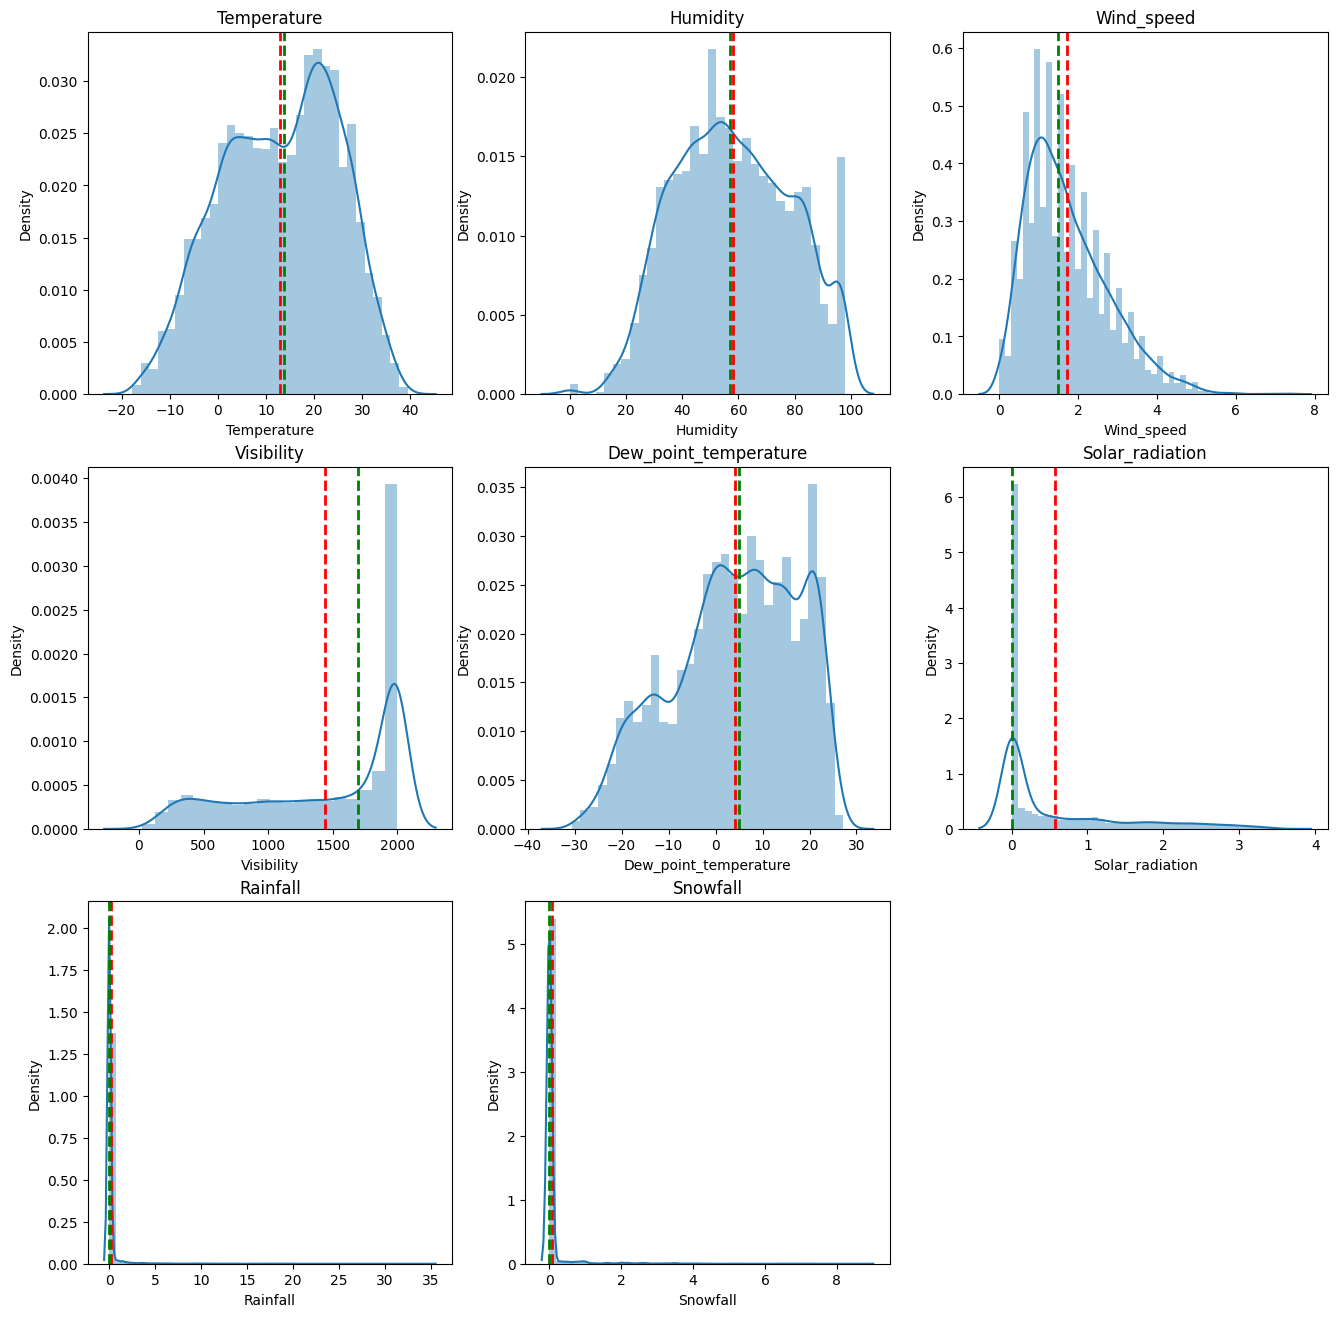

In [131]:
# for loop for visualizing the distribution of all numerical features by dist plot

plt.figure(figsize = (16,16))
for i, col in enumerate(numerical_feature):
  plt.subplot(3,3,i+1)
  sns.distplot(bike_df[col])
  plt.axvline(bike_df[col].mean(),color = 'red', linestyle = 'dashed', linewidth = 2)
  plt.axvline(bike_df[col].median(),color = 'green', linestyle = 'dashed', linewidth = 2)
  plt.title(col)
plt.show()


* Based on the distribution plot shown above, we observe that the **Rainfall, Snowfall, and Solar_radiation** columns exhibit a **right-skewed distribution**, while the **Visibility** column displays a **left-skewed distribution.**

* However, in linear regression, it is generally assumed that the **dependent and independent variables should follow a normal distribution**. Therefore, in order to meet this assumption, it is recommended to **perform some transformations on the data** to make it closer to a normal distribution.

#### **Numerical Column v/s Rental_Bike_count**

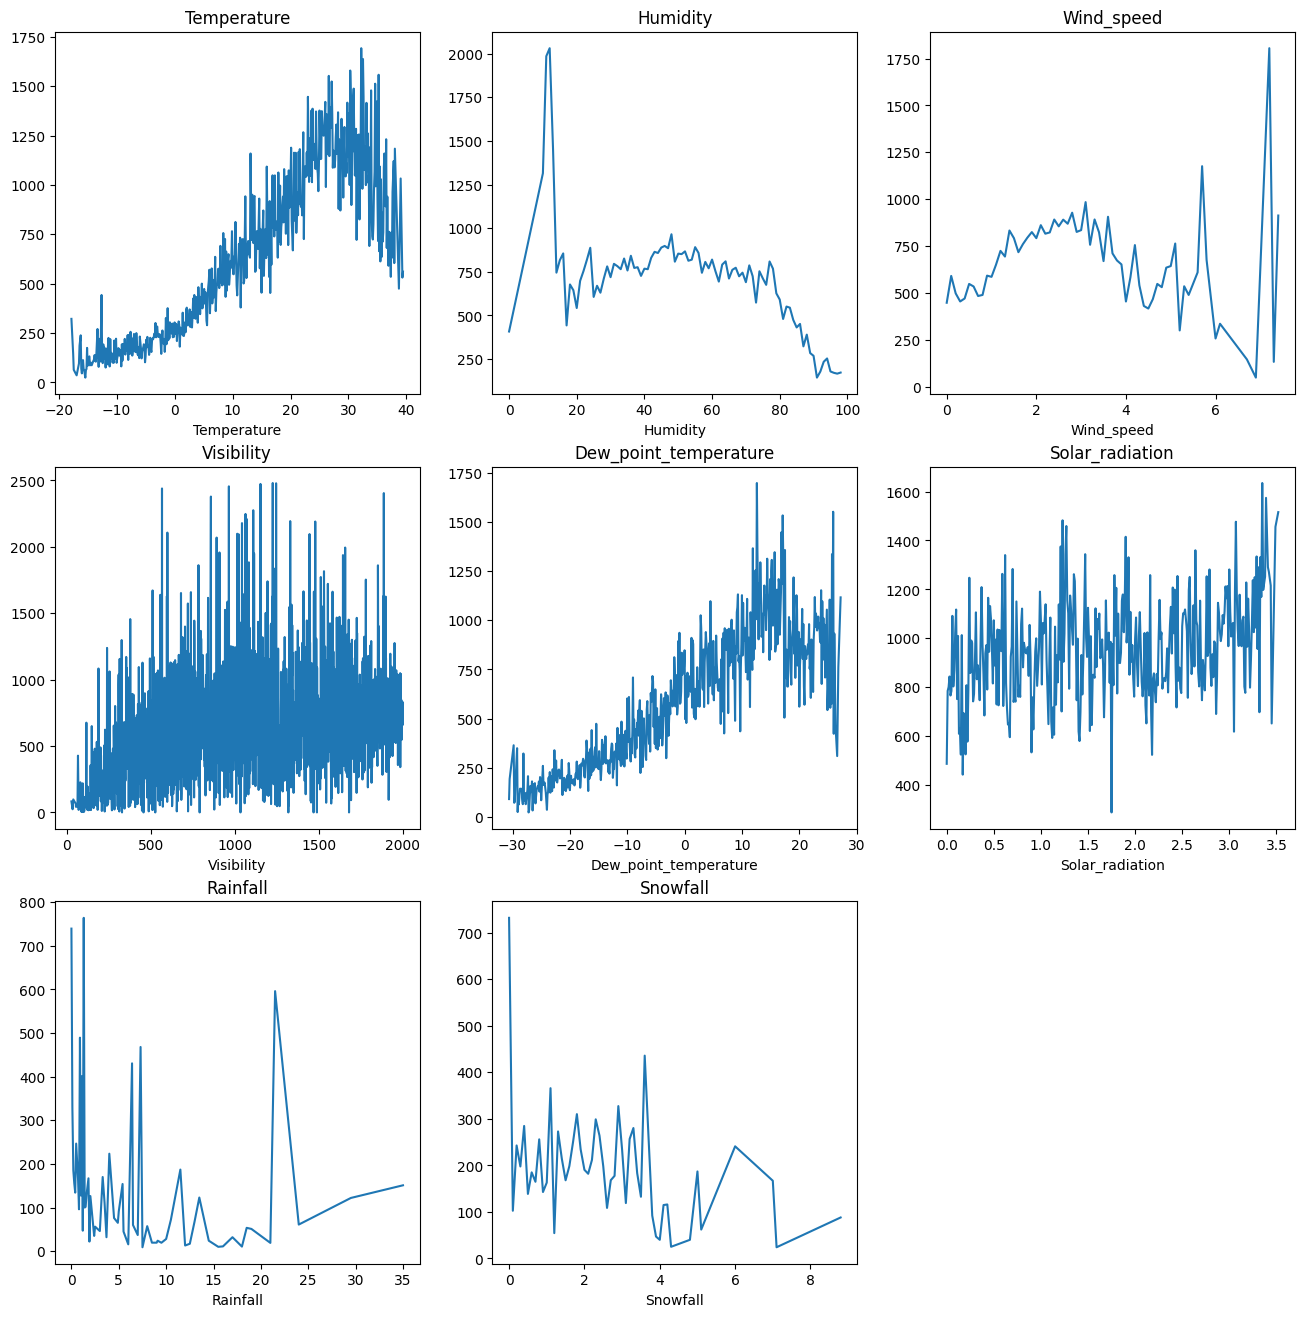

In [132]:
# for loop for visualizing the trend of Rented_Bike_count of all numerical features by line plot
plt.figure(figsize = (16,16))
for i, col in enumerate(numerical_feature):
  plt.subplot(3,3,i+1)
  bike_df.groupby(col).mean()['Rented_Bike_count'].plot();
  plt.title(col)
plt.show()


* **Based on the above graphs, we can observe the following:**

1. **Bike rentals are highest** when the temperature ranges between **25-30 degrees Celsius.**
2. The number of bike rentals decreases as humidity increases.
3. The **demand for rented bikes** remains relatively **stable across different wind speeds,** but there is a notable increase in bike demand when the wind speed reaches 7 m/s, indicating a preference for biking in slightly windy conditions.
4. There is a significant **increase in rented bike counts with higher solar radiation**, indicating a positive correlation between solar radiation and bike demand.
5. While occasional increases in bike rentals are observed during rainfall, particularly on weekdays, suggesting commuting patterns from work to home, there is no significant spike in bike rentals during rainy periods.
6. The plot highlights a significant **decrease in bike rentals when snowfall exceeds 4 cm,** indicating that snow negatively affects the demand for rented bikes.

#### **<U> Regression Plot**

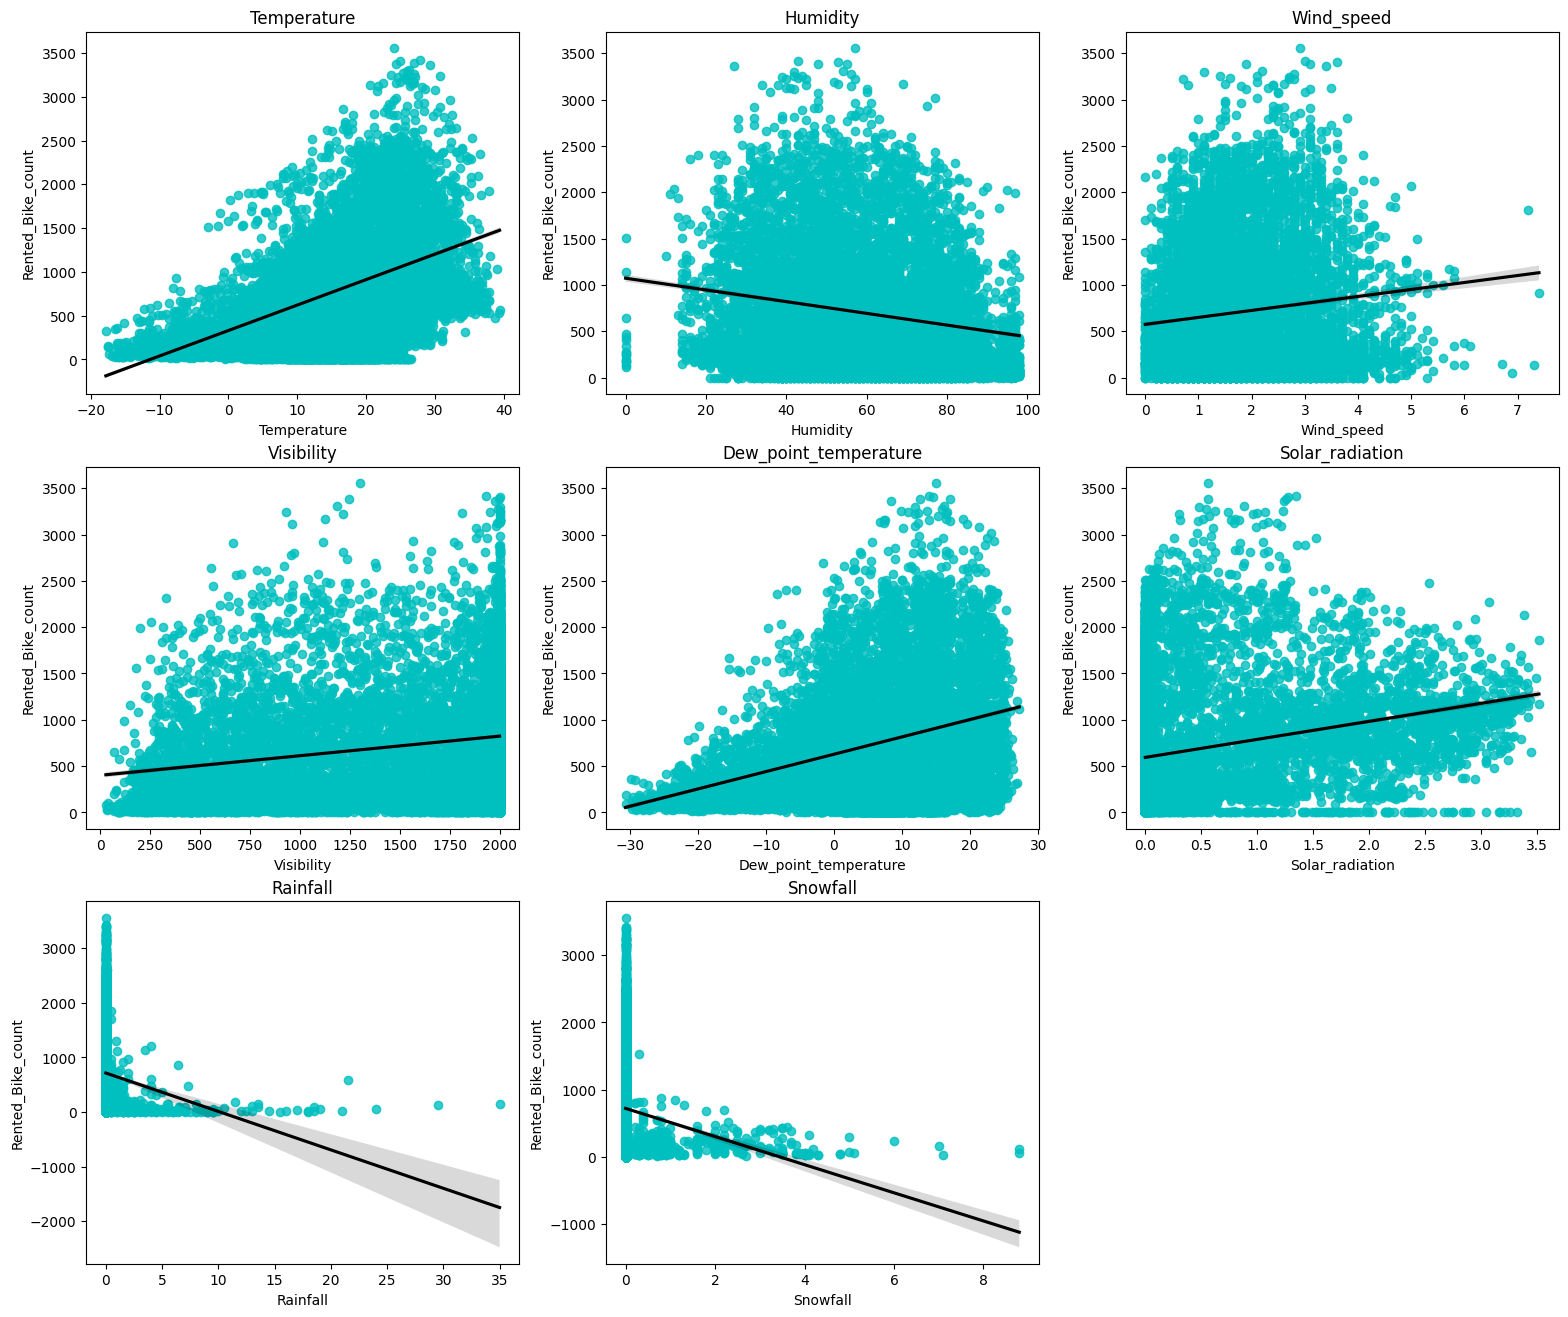

In [133]:
# for loop for visualizing the Regression plot of all numerical features by Reg plot

plt.figure(figsize = (19,16))
for i, col in enumerate(numerical_feature):
  plt.subplot(3,3,i+1)
  sns.regplot(x = bike_df[col], y = bike_df['Rented_Bike_count'], scatter_kws = {'color':'c'}, line_kws={'color':'black'});
  plt.title(col)
plt.show()


1. Based on the regression plot shown above, we observe that the columns **Temperature, Wind_speed, Visibility, Dew_point_temperature, and Solar_radiation exhibit a positive correlation with the dependent variable.** This means that as these features increase, the count of rented bikes also tends to increase.

2. Conversely, the columns **Rainfall, Snowfall, and Humidity display a negative correlation with the dependent variable.** Consequently, as these features increase, the count of rented bikes tends to decrease

#### **<u> Checking Outliers**  

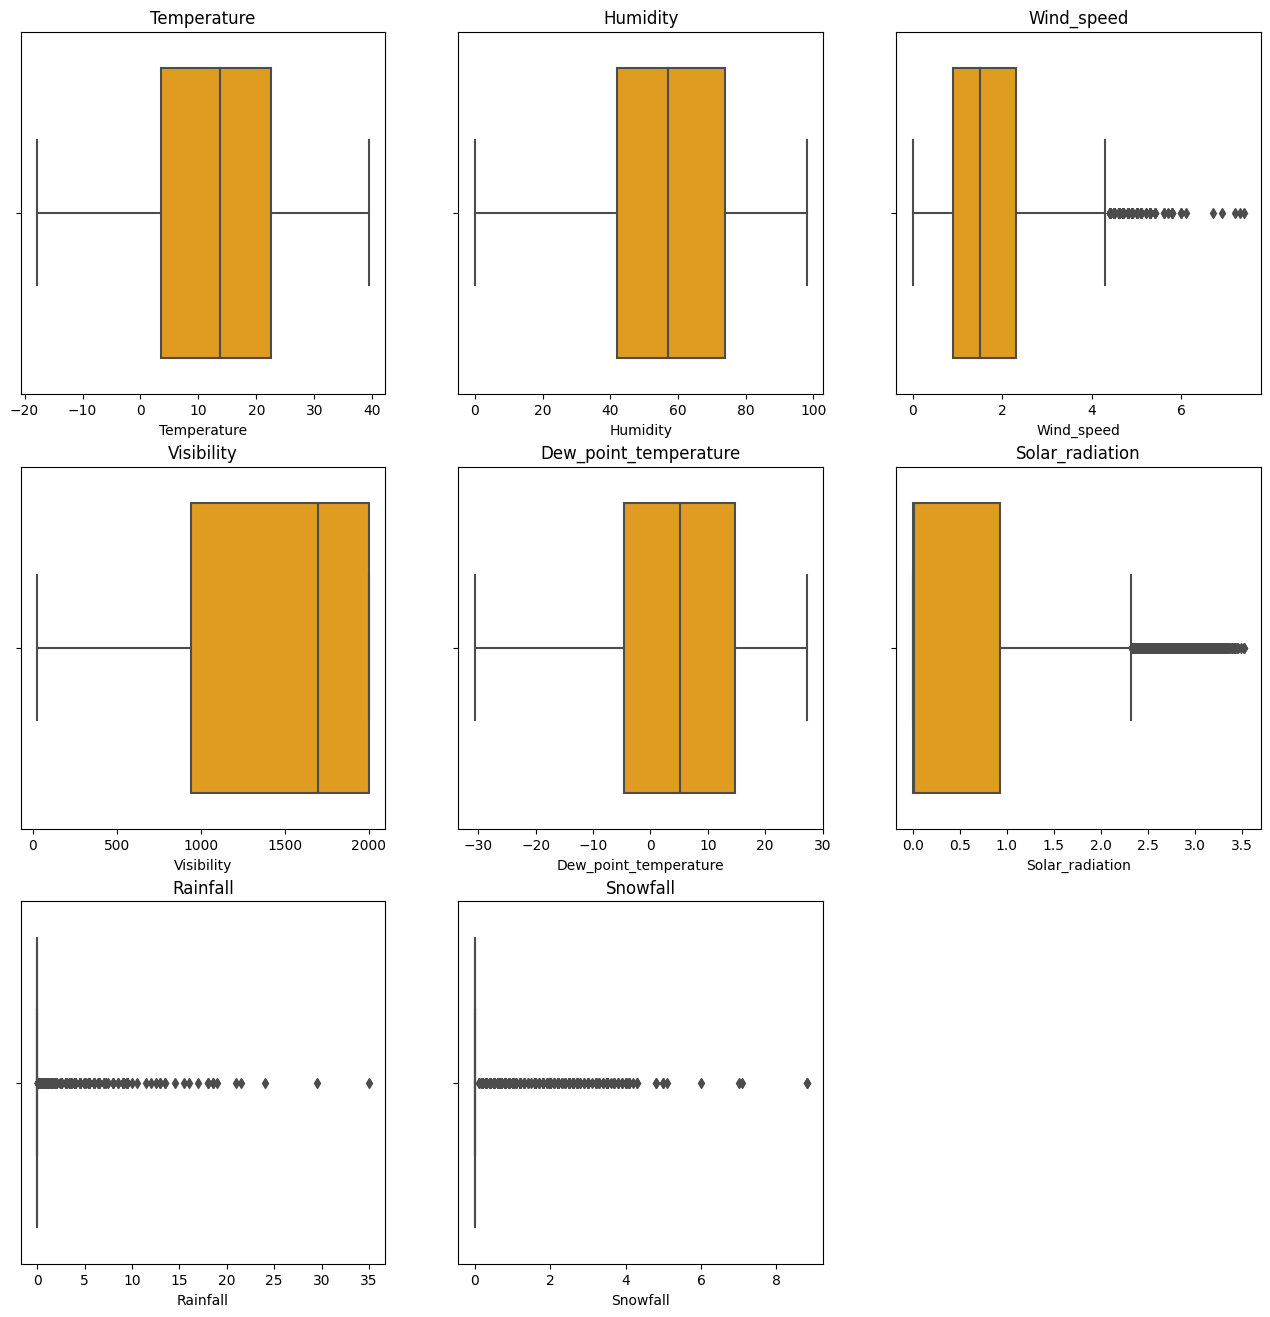

In [134]:
# for loop for visualizing the outliers in all numerical features by box plot

plt.figure(figsize = (16,16))
for n, col in enumerate(numerical_feature):
  plt.subplot(3,3,n+1)
  sns.boxplot(x = bike_df[col], color = 'orange')
  plt.title(col)
plt.show()

* Based on the boxplot depicted above, we can observe the presence of **outliers** in the columns **Wind_speed, Solar_radiation, Rainfall, and Snowfall.** It is necessary to address these outliers through appropriate treatment methods.

### **Categorical Features Analysis**

#### **<U> Categorical Column v/s Dependent Variable(Rented_Bike_count)**

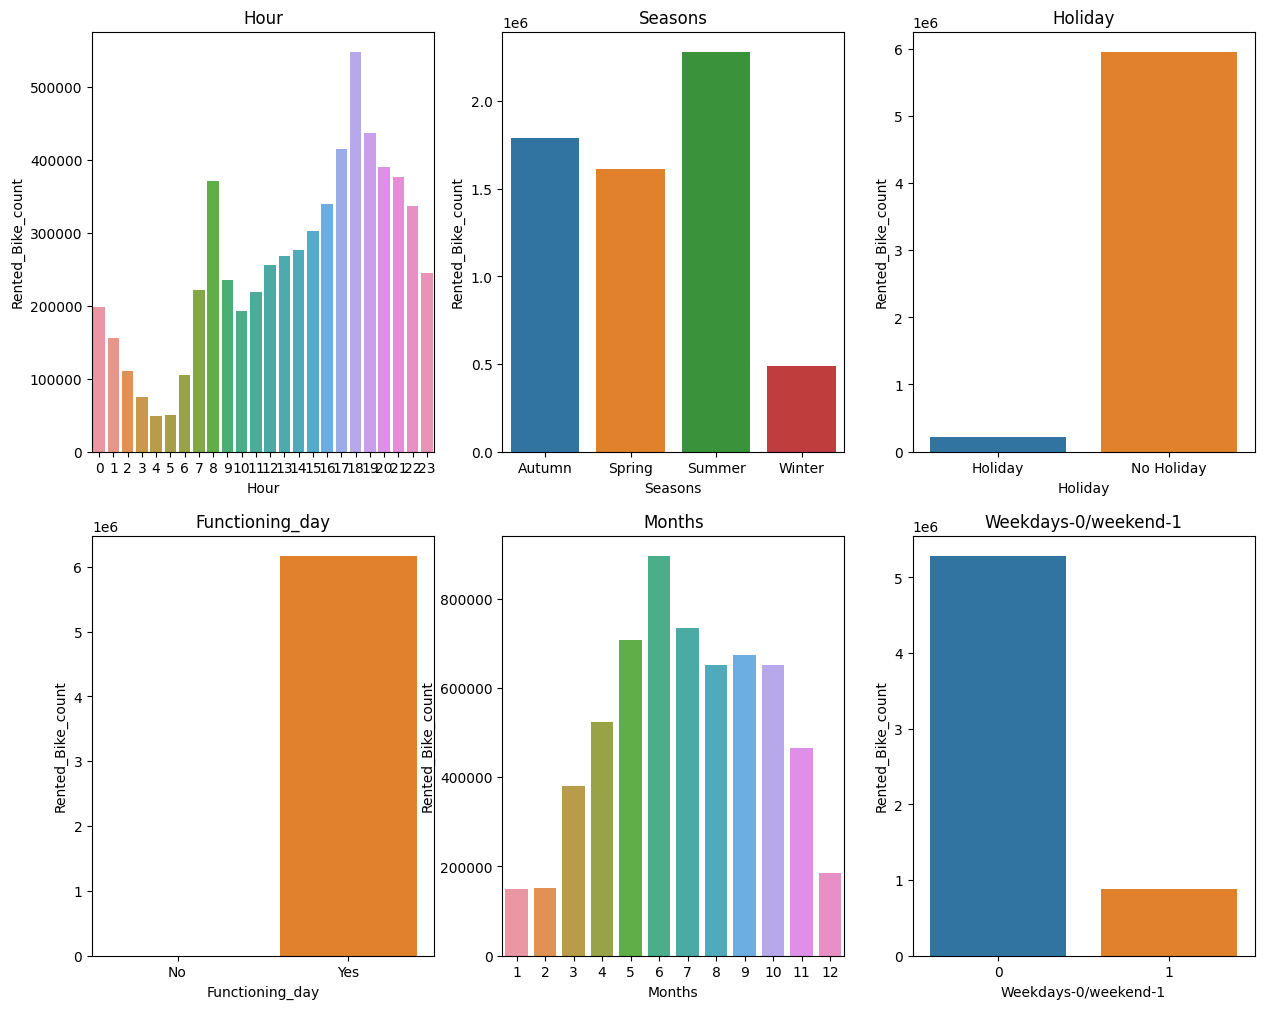

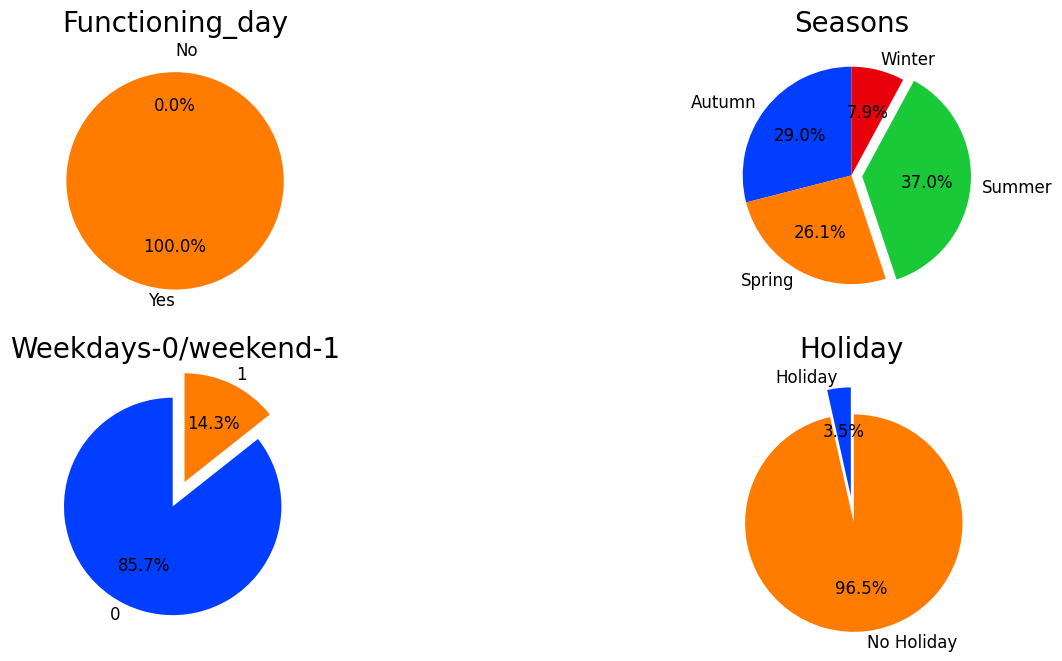

In [135]:
# for loop for visualizing the trend of Rented_Bike_count of all Category feature by Bar Chart

plt.figure(figsize = (15,12))
for i, col in enumerate(category_feature):
  plt.subplot(2,3,i+1)
  Sum_of_rented_bike_count = bike_df.groupby(col)['Rented_Bike_count'].sum().reset_index()
  sns.barplot(data = Sum_of_rented_bike_count, x= col, y = 'Rented_Bike_count')
  plt.title(col)
plt.show()

# for loop for visualizing the proportion of category columns wrt Rented_bike_count by Pie chart

palette_color = sns.color_palette('bright')
plt.figure(figsize = (16,12))
Cate = ['Functioning_day', 'Seasons', 'Weekdays-0/weekend-1','Holiday']
for i, col in enumerate(Cate):
  plt.subplot(3,2,i+1)
  explode = [[0.05,0.05],[0.0,0.0,0.1,0.0], [0.05,0.2], [0.05,0.2]]
  Sum_of_rented_bike_count = bike_df.groupby(col)['Rented_Bike_count'].sum()
  plt.pie(Sum_of_rented_bike_count , labels = Sum_of_rented_bike_count.index, autopct = '%0.1f%%', colors=palette_color, explode = explode[i], textprops = {'fontsize':12}, startangle=90)
  plt.title(col, fontsize = 20)
plt.show()

* **Based on the above graphs, we can observe the following:**                
1. The highest number of bike rentals occurs during two time periods: **7am to 9am and 5pm to 7pm**, which align with typical working hours.

2. The majority of bike rentals, accounting for **37%** of the total, take place during the **Summer season**, followed by the **Autumn season at 29%.**

3. When there are **no holidays, 96.5%** of bike rentals occur, whereas only *3.5%** of rentals happen during **holidays.**

4. Rented bikes are not utilized on non-functioning days.

5. Based on the bar plot analysis, it is evident that the demand for rented bikes is significantly higher from **May to October compared to other months.**

6. **On weekdays, 85.7%** of the total bikes are rented, while only **14.3% of bikes are rented on weekends.**

#### **Categorical Variables and their Effect on Hourly and Montly Rented Bike Count**

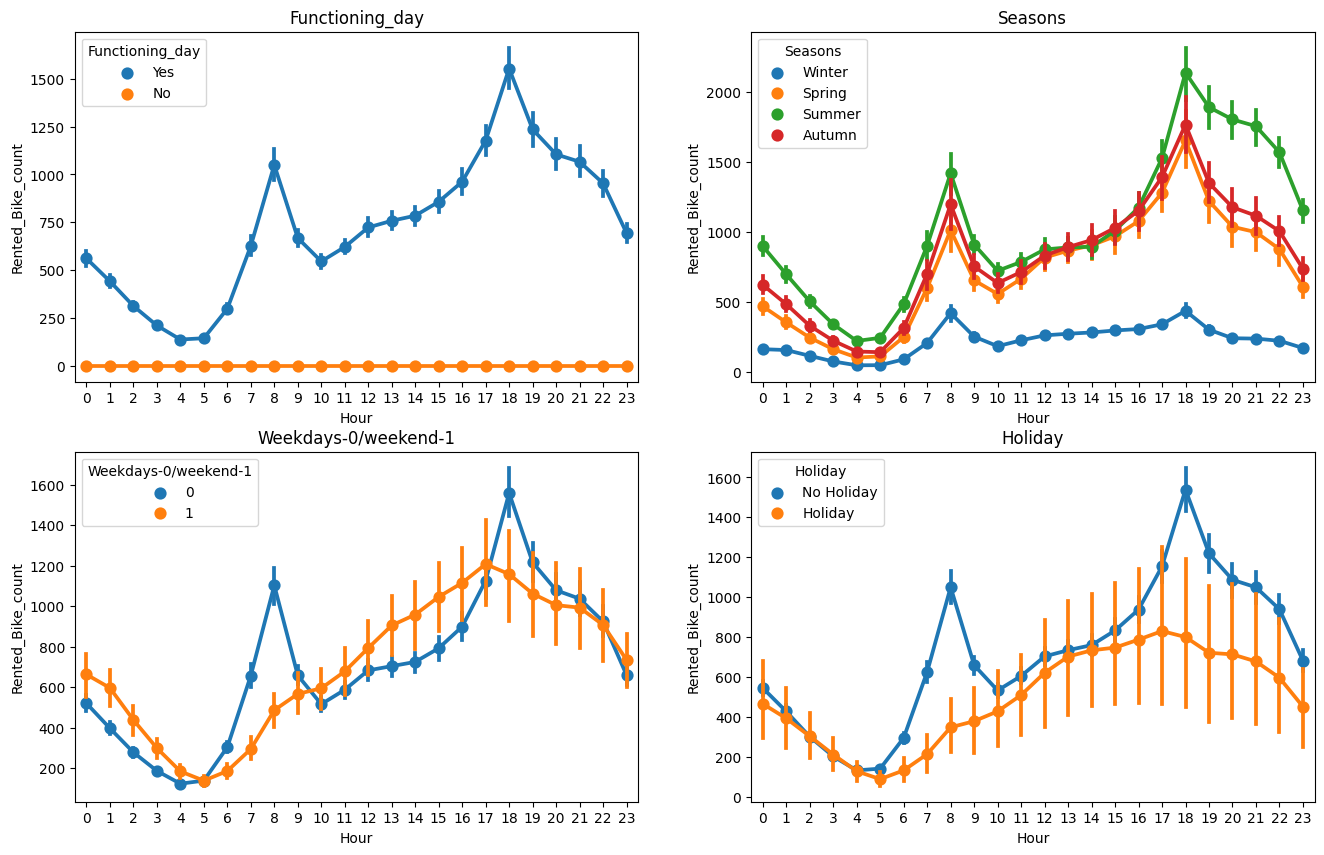

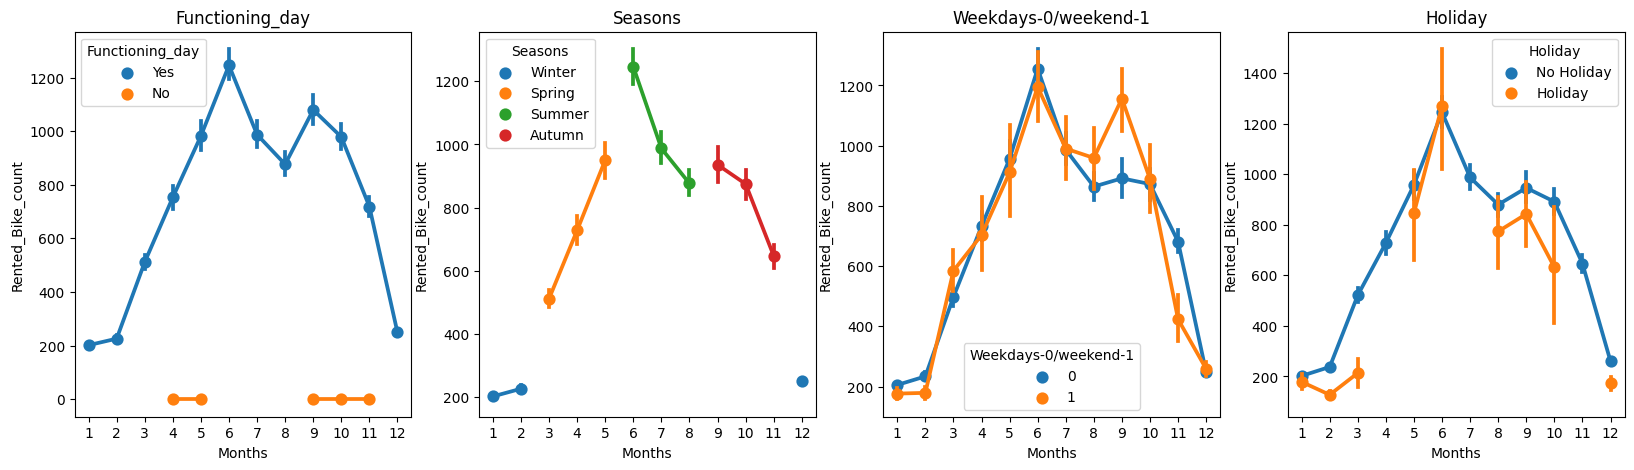

In [136]:
# for loop for visualizing trend of rented bike count wrt hours for different categorical columns by pointplot

plt.figure(figsize = (16,10))
for i, col in enumerate(Cate):
  plt.subplot(2,2,i+1)
  sns.pointplot(data = bike_df, x='Hour', y ='Rented_Bike_count', hue = col)
  plt.title(col)
plt.show()

# for loop for visualizing trend of rented bike count wrt months for different categorical columns by pointplot

plt.figure(figsize = (20,5))
for i, col in enumerate(Cate):
  plt.subplot(1,4,i+1)
  sns.pointplot(data = bike_df, x='Months', y ='Rented_Bike_count', hue = col)
  plt.title(col)
plt.show()

1. During **weekdays and functioning days, the demand for bike rentals is higher**, especially during peak hours from **7 am to 9 am and 5 pm to 9 pm**, due to office-related activities.

2. On **weekend days, the demand for rented bikes is generally low**, particularly during the morning hours. However, there is a **slight increase in demand observed from 4 pm to 8 pm**.

3. The highest number of rented bikes is observed during the summer season, with peak times occurring from 7 am to 9 am and 5 pm to 9 pm. In contrast, the lowest number of rented bikes is seen during the winter season.

4. **During holidays, the highest number of rented bikes** is observed in the months of **May and June**, while the **lowest number is observed in the months of December, January, and February.**

5. Overall, the **usage of rented bikes is highest when there are no holidays**, with the peak time for rentals being from 2 pm to 8 pm.

### **Dependent Variable Analysis**

#### **Distribution**

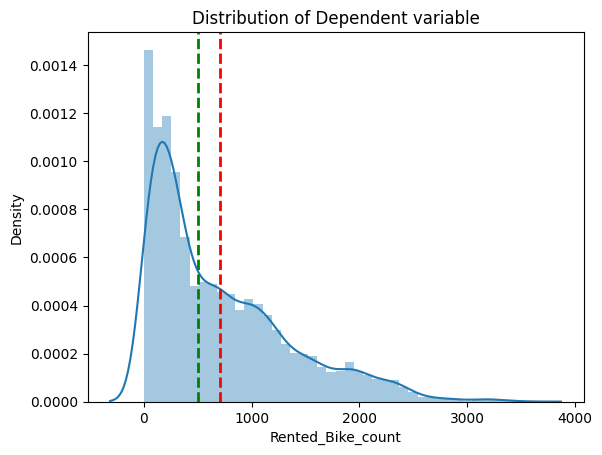

In [137]:
# Visualizing the data dritribution of Dependent Variable through dist plot

sns.distplot(bike_df['Rented_Bike_count'])
plt.axvline(bike_df['Rented_Bike_count'].mean(),color = 'red', linestyle = 'dashed', linewidth = 2)
plt.axvline(bike_df['Rented_Bike_count'].median(),color = 'green', linestyle = 'dashed', linewidth = 2)
plt.title('Distribution of Dependent variable')
plt.show()

* Based on the distribution plot shown above, we observe that the data in Rented_Bike_count column exhibit a **right-skewed distribution**.

* However, in linear regression, it is generally assumed that the dependent and independent variables should follow a normal distribution. Therefore, in order to meet this assumption, it is recommended to **perform some transformations on the data to make it closer to a normal distribution**.

#### **Outliers**

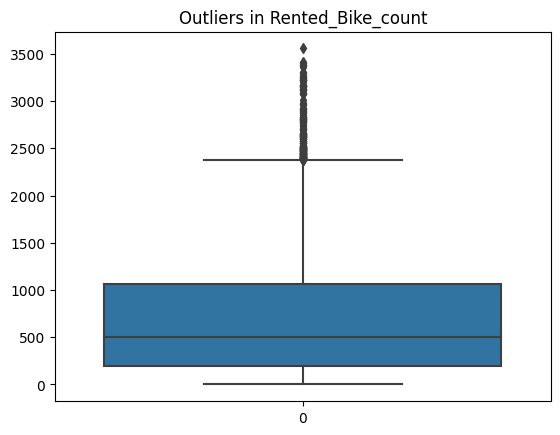

In [138]:
# Visualizing Outliers in Dependent variable through box plot

sns.boxplot(bike_df['Rented_Bike_count'])
plt.title('Outliers in Rented_Bike_count')
plt.show()

* From above plot we can see outliers in Rented_Bike_count column which need to be treated.

### **Correction - Heatmap**

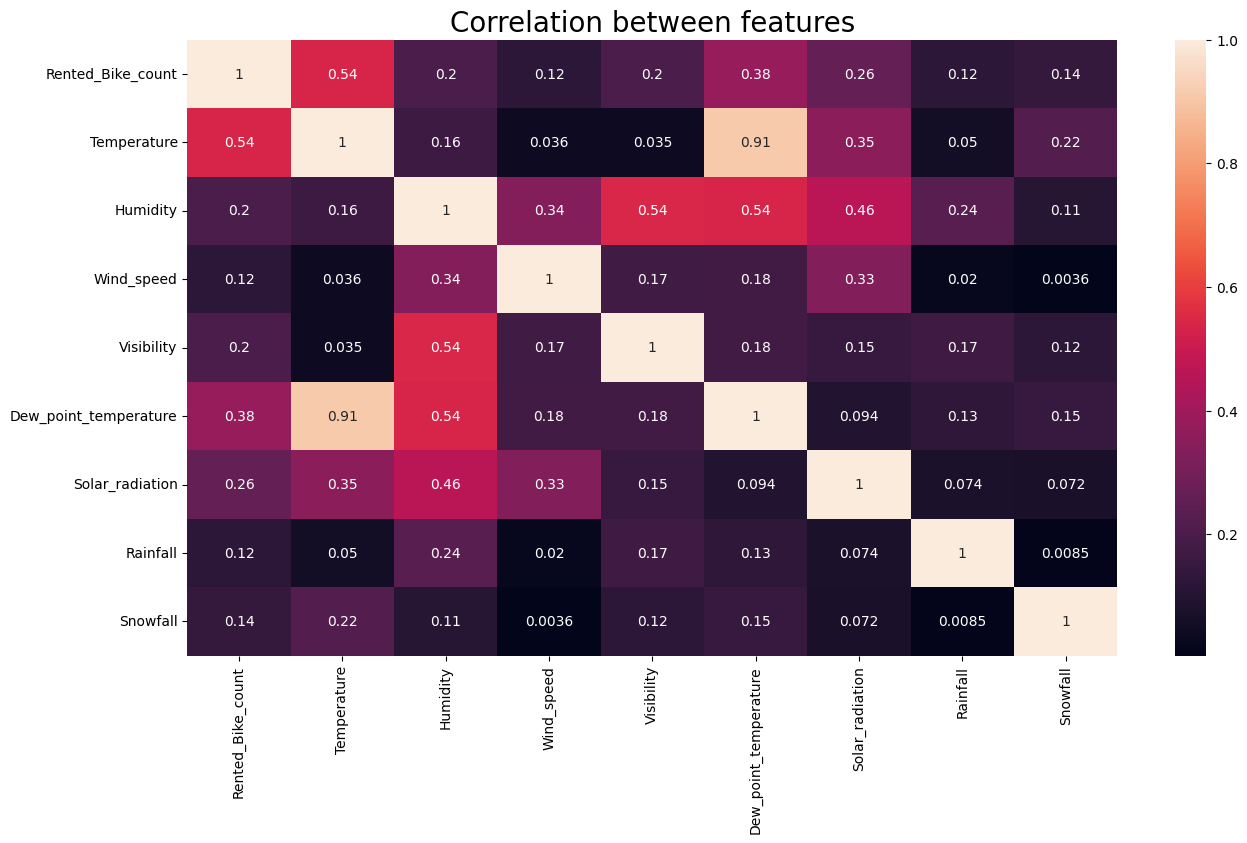

In [139]:
# checking the correlation b/w variables through heat map
plt.figure(figsize = (15,8))
df_correlation = bike_df.corr()
sns.heatmap(abs(df_correlation), annot=True)
plt.title('Correlation between features', fontsize = 20)
plt.show()

* The correlation heatmap reveals a **strong positive correlation of 0.91 between the 'Temperature' and 'Dew point temperature' columns**. As we aim to build the most suitable model, it is advisable to **drop one of these features**, either 'Temperature' or 'Dew Point Temperature'. By doing so, we can **reduce potential issues related to multicollinearity** and ensure the model's stability and accuracy.

**We can observe on the heatmap that on the target variable line the most positively correlated variables to the bike rent are :**

1. Temperature
2. Dew point temperature
3. Solar radiation
4. Hour

**And most negatively correlated variables are:**

1. Humidity
2. Rainfall


## ***6. Feature Engineering & Data Pre-processing***

### **1. Creating copying of Datasets**

In [140]:
copy_df = bike_df.copy()

In [141]:
copy_df.head()

Rented_Bike_count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254    0         -5.2        37         2.2        2000   
1                204    1         -5.5        38         0.8        2000   
2                173    2         -6.0        39         1.0        2000   
3                107    3         -6.2        40         0.9        2000   
4                 78    4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_day Months Weekdays-0/weekend-1  
0  No Holiday             Yes     12                    0  
1  No Holiday             Yes     12                    0  
2  No Holiday             Yes     12                    0  
3  No Holiday             Yes     12                    0  
4  No Holiday             Yes     12                    0

### **2. Handling Outliers**

**Outliers are data points that significantly deviate from the overall pattern or distribution of a dataset.**

They are observations that are unusually distant from other data points and can be either exceptionally high (positive outliers) or exceptionally low (negative outliers) in comparison to the majority of the data.            
**These can cause the data to skew and affect the accuracy of the ML model.**

<font size = 5> **Methods to treat outliers:**

**Trimming/Remove the outliers:** In this technique, we remove the outliers from the dataset. Although it is not a good practice to follow.


**Quantile based flooring and capping:** In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.


**Mean/Median imputation:** As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.




In [142]:
# Based on the above box plot, we can observe that the 'Rented_Bike_Count', 'Rainfall(mm)','Wind speed (m/s)','Snowfall (cm)','Solar Radiation (MJ/m2)' columns contain outliers.
# making a list of all the columns having outliers. so we can treat them.

outliers_col = ['Rented_Bike_count','Wind_speed','Solar_radiation']
outliers_col

['Rented_Bike_count', 'Wind_speed', 'Solar_radiation']

In [143]:
# making the Inter-Quertile-Range for outliers columns

Q1 = copy_df[outliers_col].quantile(0.25)
Q3 = copy_df[outliers_col].quantile(0.75)
IQR = Q3-Q1
IQR

Rented_Bike_count    874.25
Wind_speed             1.40
Solar_radiation        0.93
dtype: float64

In [144]:
# creating upper and lower limit for removing outliers

upper_fence = IQR + (1.5*IQR)
lower_fence = IQR - (1.5*IQR)

In [145]:
# removing outliers from the datasets

copy_df[outliers_col] = copy_df[outliers_col][~((copy_df[outliers_col] > upper_fence) | (copy_df[outliers_col] < lower_fence))]

In [146]:
# After removing outliers we got some values

copy_df.isnull().sum()

Rented_Bike_count        308
Hour                       0
Temperature                0
Humidity                   0
Wind_speed               616
Visibility                 0
Dew_point_temperature      0
Solar_radiation          641
Rainfall                   0
Snowfall                   0
Seasons                    0
Holiday                    0
Functioning_day            0
Months                     0
Weekdays-0/weekend-1       0
dtype: int64

In [147]:
# replacing outliers with median of the col
copy_df[outliers_col] = copy_df[outliers_col].fillna(copy_df[outliers_col].median())

In [148]:
copy_df.isnull().sum()

Rented_Bike_count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_day          0
Months                   0
Weekdays-0/weekend-1     0
dtype: int64

### **3. Data Transformation**

In [149]:
# Handling skewness of the columns - Changing data distribution to normal distribution

copy_df['Rented_Bike_count'] = np.sqrt(copy_df['Rented_Bike_count'])
copy_df['Solar_radiation'] = np.cbrt(copy_df['Solar_radiation'])
copy_df['Visibility'] = np.cbrt(copy_df['Visibility'])
copy_df['Rainfall'] = np.cbrt(copy_df['Rainfall'])
copy_df['Snowfall'] = np.cbrt(copy_df['Snowfall'])


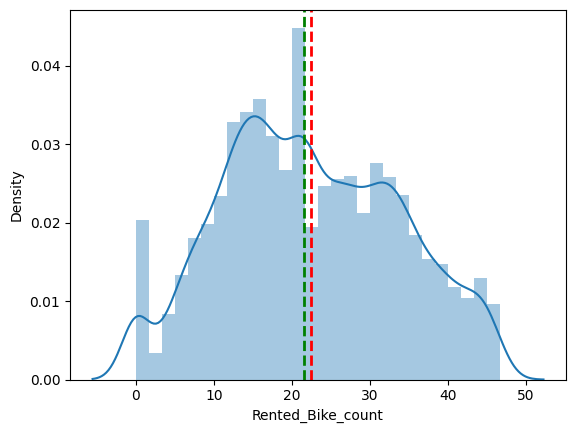

In [150]:
# checking the distribution of Dependent variable after data trasformation

sns.distplot(copy_df['Rented_Bike_count'])
plt.axvline(copy_df['Rented_Bike_count'].mean(),color = 'red', linestyle = 'dashed', linewidth = 2)
plt.axvline(copy_df['Rented_Bike_count'].median(),color = 'green', linestyle = 'dashed', linewidth = 2)

<Axes: xlabel='Rented_Bike_count'>

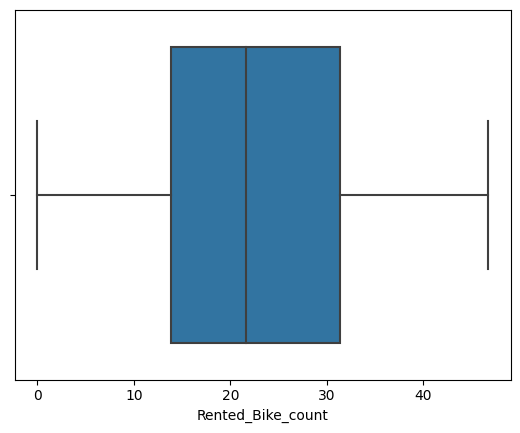

In [151]:
# checking the outlier of Dependent variable after removing.

sns.boxplot(x = copy_df['Rented_Bike_count'])

### **4. Feature Selection**

#### **Handling Multicollinearity using VIF**

**Variance inflation factor(VIF)** detects multicollinearity.
A rule of thumb for interpreting the variance inflation factor:

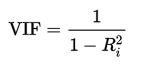

* VIF = 1 = not correlated.

* VIF Between 1 and 5 = moderately correlated.

* VIF Greater than 5 = highly correlated.

In [152]:
# importing liberay for variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating a function to calcualte VIF

def VIF(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [153]:
# creating list of columns having numerical values for checking VIF
numerical_list = list(set(copy_df.select_dtypes(['int64','float64','category']).columns) - {'Rented_Bike_count'})
numerical_list

['Snowfall',
 'Weekdays-0/weekend-1',
 'Hour',
 'Months',
 'Solar_radiation',
 'Dew_point_temperature',
 'Humidity',
 'Wind_speed',
 'Temperature',
 'Rainfall',
 'Visibility']

In [154]:
# calling VIF Function for calculating VIF
VIF(copy_df[numerical_list])

Columns        VIF
0                Snowfall   1.202138
1    Weekdays-0/weekend-1   1.173665
2                    Hour   4.328858
3                  Months   5.045366
4         Solar_radiation   1.931071
5   Dew_point_temperature  25.685778
6                Humidity  16.822219
7              Wind_speed   5.687234
8             Temperature  42.324226
9                Rainfall   1.260060
10             Visibility  35.061348

* Temperature, Visibility, Humidity, and Dew_point_temperature exhibit high VIF (Variance Inflation Factor) values.

* From the previous **heatmap analysis**, we noticed a **strong positive correlation between Temperature and Dew_point_temperature.**

* To address this multicollinearity issue, we need to **drop one of the variables** and reevaluate the VIF.





In [155]:
copy_df = copy_df.drop(['Dew_point_temperature'], axis = 1)
numerical_list.remove('Dew_point_temperature')

In [156]:
VIF(copy_df[numerical_list])

Columns        VIF
0              Snowfall   1.198948
1  Weekdays-0/weekend-1   1.161341
2                  Hour   4.154594
3                Months   5.036835
4       Solar_radiation   1.845082
5              Humidity   7.512732
6            Wind_speed   5.327605
7           Temperature   2.782803
8              Rainfall   1.259034
9            Visibility  12.422729

In [157]:
# dropping Visibility as it having high VIF

copy_df = copy_df.drop(['Visibility'], axis = 1)
numerical_list.remove('Visibility')

In [158]:
VIF(copy_df[numerical_list])

Columns       VIF
0              Snowfall  1.194205
1  Weekdays-0/weekend-1  1.156589
2                  Hour  3.848421
3                Months  4.478345
4       Solar_radiation  1.807409
5              Humidity  5.807098
6            Wind_speed  4.347046
7           Temperature  2.782438
8              Rainfall  1.176953

* Now VIF of all variables are **around 5**, we can move with remaining variable

In [159]:
print(numerical_list)
copy_df.head()

['Snowfall', 'Weekdays-0/weekend-1', 'Hour', 'Months', 'Solar_radiation', 'Humidity', 'Wind_speed', 'Temperature', 'Rainfall']


Rented_Bike_count Hour  Temperature  Humidity  Wind_speed  Solar_radiation  \
0          15.937377    0         -5.2        37         2.2              0.0   
1          14.282857    1         -5.5        38         0.8              0.0   
2          13.152946    2         -6.0        39         1.0              0.0   
3          10.344080    3         -6.2        40         0.9              0.0   
4           8.831761    4         -6.0        36         2.3              0.0   

   Rainfall  Snowfall Seasons     Holiday Functioning_day Months  \
0       0.0       0.0  Winter  No Holiday             Yes     12   
1       0.0       0.0  Winter  No Holiday             Yes     12   
2       0.0       0.0  Winter  No Holiday             Yes     12   
3       0.0       0.0  Winter  No Holiday             Yes     12   
4       0.0       0.0  Winter  No Holiday             Yes     12   

  Weekdays-0/weekend-1  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

### **5. Categorical Encoding**

* Categorical encoding refers to the **process of converting categorical variables into numerical representations** that can be used as input for machine learning algorithms. Categorical variables are those that represent discrete categories or groups.

* In our dataset we have 3 columns that required encoding and they are **Seasons, Holiday and Functioning_day.**

In [160]:
# creating a dummy variable of column which are categorical nature by one hot encoding

copy_df = pd.get_dummies(copy_df, columns = ['Hour', 'Seasons', 'Holiday', 'Functioning_day', 'Months','Weekdays-0/weekend-1'], drop_first = True)

In [161]:
copy_df.head()

Rented_Bike_count  Temperature  Humidity  Wind_speed  Solar_radiation  \
0          15.937377         -5.2        37         2.2              0.0   
1          14.282857         -5.5        38         0.8              0.0   
2          13.152946         -6.0        39         1.0              0.0   
3          10.344080         -6.2        40         0.9              0.0   
4           8.831761         -6.0        36         2.3              0.0   

   Rainfall  Snowfall  Hour_1  Hour_2  Hour_3  ...  Months_4  Months_5  \
0       0.0       0.0       0       0       0  ...         0         0   
1       0.0       0.0       1       0       0  ...         0         0   
2       0.0       0.0       0       1       0  ...         0         0   
3       0.0       0.0       0       0       1  ...         0         0   
4       0.0       0.0       0       0       0  ...         0         0   

   Months_6  Months_7  Months_8  Months_9  Months_10  Months_11  Months_12  \
0         0         0         0         0          0          0          1   
1         0         0         0         0          0          0          1   
2         0         0         0         0          0          0          1   
3         0         0         0         0          0          0          1   
4         0         0         0         0          0          0          1   

   Weekdays-0/weekend-1_1  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 47 columns]

In [162]:
copy_df.columns

Index(['Rented_Bike_count', 'Temperature', 'Humidity', 'Wind_speed',
       'Solar_radiation', 'Rainfall', 'Snowfall', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning_day_Yes', 'Months_2', 'Months_3',
       'Months_4', 'Months_5', 'Months_6', 'Months_7', 'Months_8', 'Months_9',
       'Months_10', 'Months_11', 'Months_12', 'Weekdays-0/weekend-1_1'],
      dtype='object')

### **6. Data Splitting**

In [163]:
# Creating Independent and Dependent variable

x = copy_df.drop(columns = ['Rented_Bike_count'], axis = 1)
y = np.sqrt(copy_df['Rented_Bike_count'])

In [164]:
x.head()

Temperature  Humidity  Wind_speed  Solar_radiation  Rainfall  Snowfall  \
0         -5.2        37         2.2              0.0       0.0       0.0   
1         -5.5        38         0.8              0.0       0.0       0.0   
2         -6.0        39         1.0              0.0       0.0       0.0   
3         -6.2        40         0.9              0.0       0.0       0.0   
4         -6.0        36         2.3              0.0       0.0       0.0   

   Hour_1  Hour_2  Hour_3  Hour_4  ...  Months_4  Months_5  Months_6  \
0       0       0       0       0  ...         0         0         0   
1       1       0       0       0  ...         0         0         0   
2       0       1       0       0  ...         0         0         0   
3       0       0       1       0  ...         0         0         0   
4       0       0       0       1  ...         0         0         0   

   Months_7  Months_8  Months_9  Months_10  Months_11  Months_12  \
0         0         0         0          0          0          1   
1         0         0         0          0          0          1   
2         0         0         0          0          0          1   
3         0         0         0          0          0          1   
4         0         0         0          0          0          1   

   Weekdays-0/weekend-1_1  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 46 columns]

In [165]:
y.head()

0    3.992165
1    3.779267
2    3.626699
3    3.216221
4    2.971828
Name: Rented_Bike_count, dtype: float64

In [166]:
# creating training and test data by train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [167]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7008, 46) (1752, 46) (7008,) (1752,)


In [168]:
x_train

Temperature  Humidity  Wind_speed  Solar_radiation  Rainfall  Snowfall  \
2031          8.2        62         0.6         1.068530  0.000000       0.0   
6570         28.4        57         2.4         0.943539  0.000000       0.0   
6371         29.9        57         1.7         0.958284  0.464159       0.0   
3490         14.8        29         0.6         1.300591  0.000000       0.0   
7700         12.2        47         1.1         0.000000  0.000000       0.0   
...           ...       ...         ...              ...       ...       ...   
4373         17.8        75         1.0         0.000000  0.000000       0.0   
7891         16.4        47         1.0         0.000000  0.000000       0.0   
4859         25.5        57         1.8         0.000000  0.000000       0.0   
3264          8.3        59         2.1         0.000000  0.000000       0.0   
2732          7.1        83         3.3         0.000000  0.000000       0.0   

      Hour_1  Hour_2  Hour_3  Hour_4  ...  Months_4  Months_5  Months_6  \
2031       0       0       0       0  ...         0         0         0   
6570       0       0       0       0  ...         0         0         0   
6371       0       0       0       0  ...         0         0         0   
3490       0       0       0       0  ...         1         0         0   
7700       0       0       0       0  ...         0         0         0   
...      ...     ...     ...     ...  ...       ...       ...       ...   
4373       0       0       0       0  ...         0         0         1   
7891       0       0       0       0  ...         0         0         0   
4859       0       0       0       0  ...         0         0         1   
3264       0       0       0       0  ...         1         0         0   
2732       0       0       0       0  ...         0         0         0   

      Months_7  Months_8  Months_9  Months_10  Months_11  Months_12  \
2031         0         0         0          0          0          0   
6570         0         1         0          0          0          0   
6371         0         1         0          0          0          0   
3490         0         0         0          0          0          0   
7700         0         0         0          1          0          0   
...        ...       ...       ...        ...        ...        ...   
4373         0         0         0          0          0          0   
7891         0         0         0          1          0          0   
4859         0         0         0          0          0          0   
3264         0         0         0          0          0          0   
2732         0         0         0          0          0          0   

      Weekdays-0/weekend-1_1  
2031                       0  
6570                       0  
6371                       0  
3490                       0  
7700                       0  
...                      ...  
4373                       0  
7891                       0  
4859                       0  
3264                       0  
2732                       1  

[7008 rows x 46 columns]

### **3. Data Scaling**

In [169]:
# rescaling data by Standardscaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### **4. Creating Functions for checking performance of model**

In [170]:
#creating function to calculate model score, intercept, coefficient

def model_score_inter_coef(model, x_train, y_train):
  score = print('Score: ', model.score(x_train,y_train))
  intercept = print('Intercept: ', model.intercept_)
  coefficient = print('coefficient: ', model.coef_)

  return(score, coefficient, intercept)


In [171]:
# creating function to calculate evalution matrics
def mat_eval(model, x_tarin, x_test, y_train, y_test):

    # get predicted value of train and test dataset
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    # creating dataframe to store the values of matrics for train and test datasets
    test_df = pd.DataFrame()
    train_df = pd.DataFrame()

    # calculating mean squared error for test dataset
    MSE = mean_squared_error(y_test, y_pred_test)

   # calculating root mean squared error test dataset
    RMSE = np.sqrt(MSE)

    # calculating r squared test dataset
    r2 = r2_score(y_test, y_pred_test)

    # calculating adjusted r squared test dataset
    Adj_r2 = 1-(1-r2)*((x_test.shape[0] - 1)/(x_test.shape[0] - x_test.shape[1] - 1))

    # creating dict of all matrics values for test datasets
    test_metrics = {
              'Model': model,
              'MSE': MSE,
              'RMSE': RMSE,
              'R2': r2,
              'Adjusted R2': Adj_r2,
              }

    # storing the value in dataframe
    test_df = test_df.append(test_metrics, ignore_index=True)



    # calculating mean squared error for train dataset
    Tr_MSE = mean_squared_error(y_train, y_pred_train)

    # calculating root mean squared error train dataset
    Tr_RMSE = np.sqrt(Tr_MSE)

    # calculating r squared train dataset
    Tr_r2 = r2_score(y_train, y_pred_train)

     # calculating adjusted r squared train dataset
    Tr_Adj_r2 = 1-(1-r2)*((x_train.shape[0] - 1)/(x_train.shape[0] - x_train.shape[1] - 1))

    # creating dict of all matrics values for test datasets
    train_metrics = {
              'Model' : model,
              'MSE': Tr_MSE,
              'RMSE': Tr_RMSE,
              'R2': Tr_r2,
              'Adjusted R2': Tr_Adj_r2
          }

    # storing the value in dataframe
    train_df = train_df.append(train_metrics, ignore_index=True)


    # concatenating both the dataframe in single dataframe
    result=pd.concat([train_df,test_df],keys=['Training set','Test set'])

    return result


In [172]:
# creaating function for graphical representation

def graph_rep(model, x_train,x_test,y_train,y_test):
  y_pred_test = model.predict(x_test)

  residuals = y_test - y_pred_test

  plt.figure(figsize = (15,4))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(['Predicted','Actual'])
  plt.title('Actual and Predicted Bike count ')


  plt.figure(figsize = (15,4))
  plt.subplot(1,2,1)
  sns.distplot(residuals)
  plt.axvline(residuals.mean(),color = 'red', linestyle = 'dashed', linewidth = 2)
  plt.xlabel('Residuals')
  plt.title('Distribution of residuals')


  plt.subplot(1,2,2)
  plt.scatter(y_pred_test,residuals)
  plt.title('scatterplot of residuals')


  try:
      importance = model.feature_importances_
      feature = x.columns
  except:
      importance = np.abs(model.coef_)
      feature = x.columns
  indices = np.argsort(importance)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importance[indices], align='center')
  plt.yticks(range(len(indices)), [feature[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

## ***7. ML Model Implementation***

### **Linear Regression**

In [173]:
# create a class of linear regression
l_reg = LinearRegression().fit(x_train,y_train)

In [174]:
# get the score, intercept and coeff value
model_score_inter_coef(l_reg, x_train, y_train)

Score:  0.8172917323123998
Intercept:  4.5323817205379004
coefficient:  [ 4.75795422e-01 -1.91359350e-01 -1.57539299e-02 -1.76695016e-02
 -3.83344539e-01 -2.60112521e-02 -5.06977273e-02 -1.20002886e-01
 -1.67906535e-01 -2.42228331e-01 -2.30761203e-01 -1.05485156e-01
  2.52134640e-02  1.04066397e-01  5.30694815e-02 -3.02954601e-02
 -2.10187571e-02  7.44114579e-03  4.90160581e-03  5.12578067e-03
  1.46602426e-02  3.38111579e-02  7.50652984e-02  4.63094119e-02
  5.56104615e-02  5.89809989e-02  9.53035737e-02  8.70942187e-02
  2.26643689e-02 -1.99338992e+10 -1.07239461e+11 -5.51552339e+10
  6.57852311e-02  9.04068411e-01 -6.42502105e-03 -2.28618873e+10
 -2.25977591e+10 -2.27039422e+10  3.27441819e+10  3.31036398e+10
  3.32053136e+10 -3.52294693e+10 -3.57237122e+10 -3.56147357e+10
  6.46148066e-02  5.12667340e-03]


(None, None, None)

In [175]:
# get the value of matrics for train and test datasets
LINEAR = mat_eval(l_reg, x_train,x_test,y_train,y_test)
LINEAR

Model       MSE      RMSE        R2  Adjusted R2
Training set 0  LinearRegression()  0.367311  0.606062  0.817292     0.829509
Test set     0  LinearRegression()  0.361667  0.601388  0.830628     0.826058

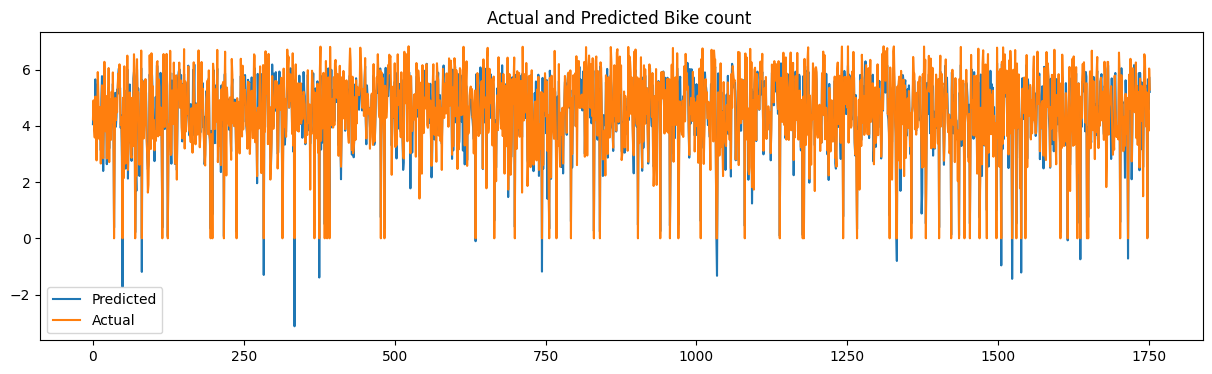

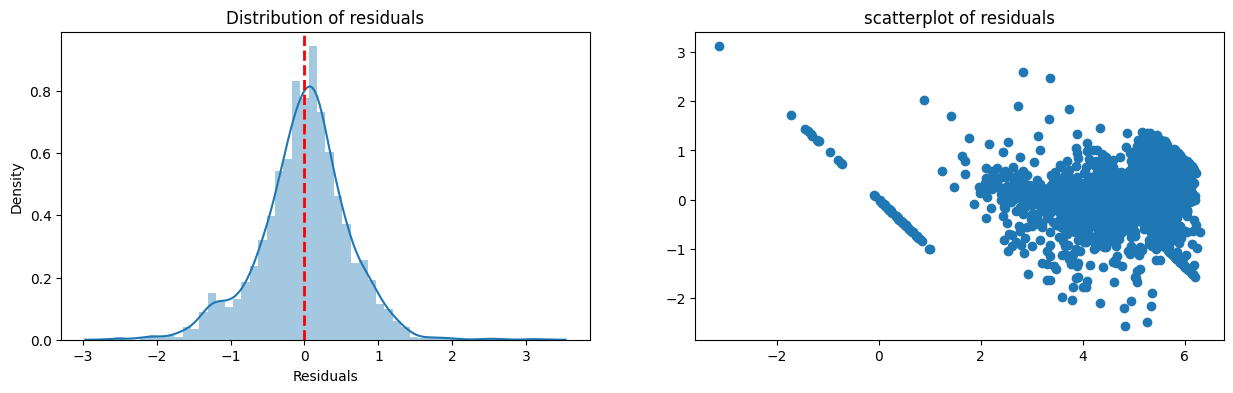

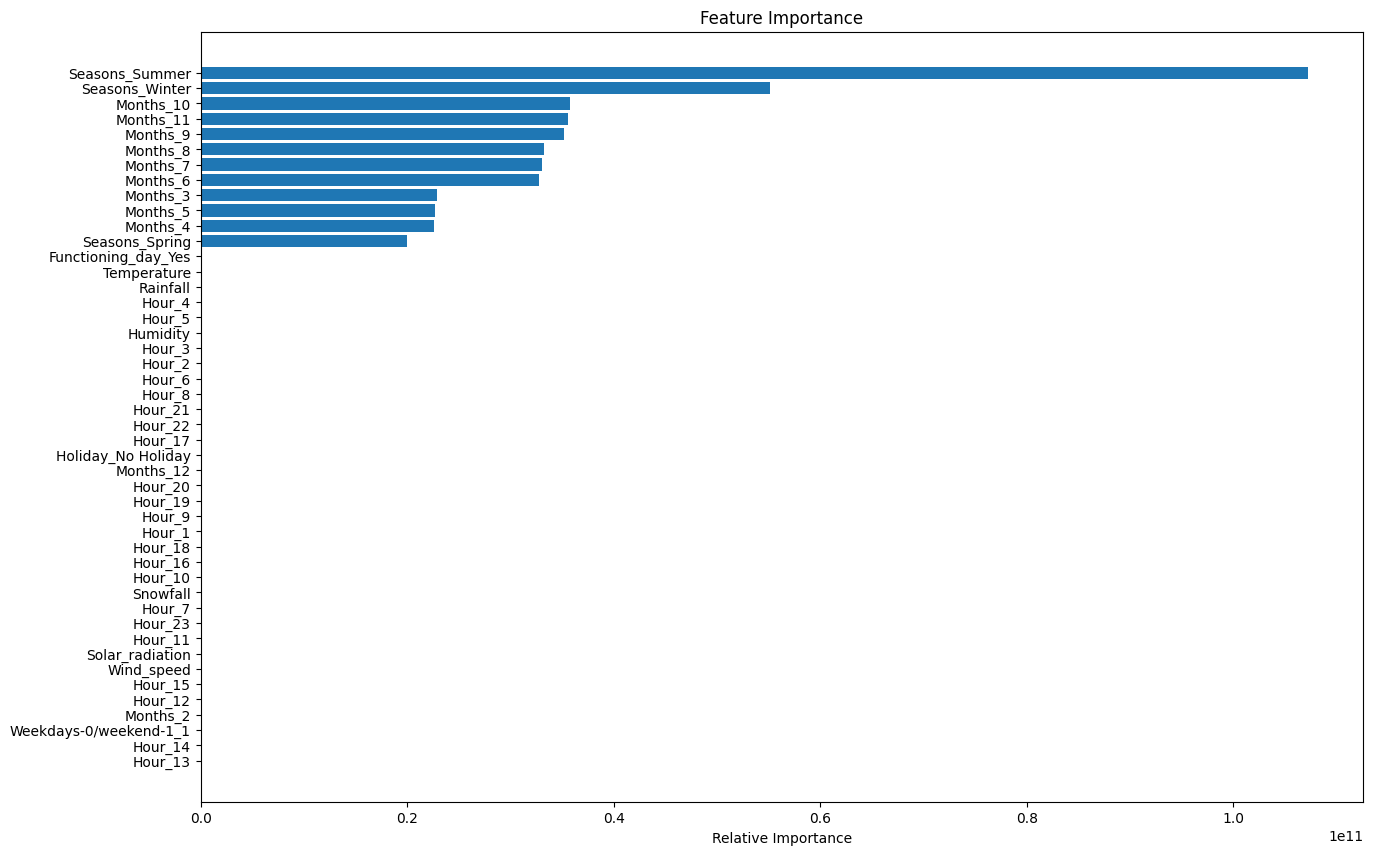

In [176]:
# graphical representation of action and predicted value and error.
graph_rep(l_reg,x_train,x_test,y_train,y_test)

* **Model** : Linear Regression

* **R2 score** of Train data : 0.817292
* **Adjusted R2 score** of Train data : 0.829509

* **R2 score** of Test data :0.830628
* **Adjusted R2 score** of Test data : 0.826058

* **Performance of data** : Working good in both Train and Test datasets.

* **Important features** : Seasons_Summer, Seasons_Winter, Months 10, 11, 9

* **Mean of residual** : 0

* There are **no clear signs of overfitting**, as the model performs well on the test set.

### **Lasso Regression**

In [177]:
# create a class of Lasso Regression
lasso = Lasso(alpha = 0.1).fit(x_train,y_train)

In [178]:
# get the score, intercept and coeff value
model_score_inter_coef(lasso, x_train, y_train)

Score:  0.7372492541239176
Intercept:  4.532386287091306
coefficient:  [ 0.41120174 -0.1443486   0.          0.         -0.28708128 -0.
 -0.         -0.0334482  -0.08644224 -0.15572294 -0.14487922 -0.02545576
  0.          0.          0.         -0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
  0.         -0.21188502  0.          0.76952321 -0.         -0.
 -0.          0.          0.         -0.         -0.          0.
  0.00514023  0.         -0.          0.        ]


(None, None, None)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [179]:
# get the value of matrics for train and test datasets
LASSO = mat_eval(lasso,x_train,x_test,y_train,y_test)
LASSO

Model       MSE      RMSE        R2  Adjusted R2
Training set 0  Lasso(alpha=0.1)  0.528226  0.726792  0.737249     0.749838
Test set     0  Lasso(alpha=0.1)  0.530675  0.728474  0.751480     0.744775

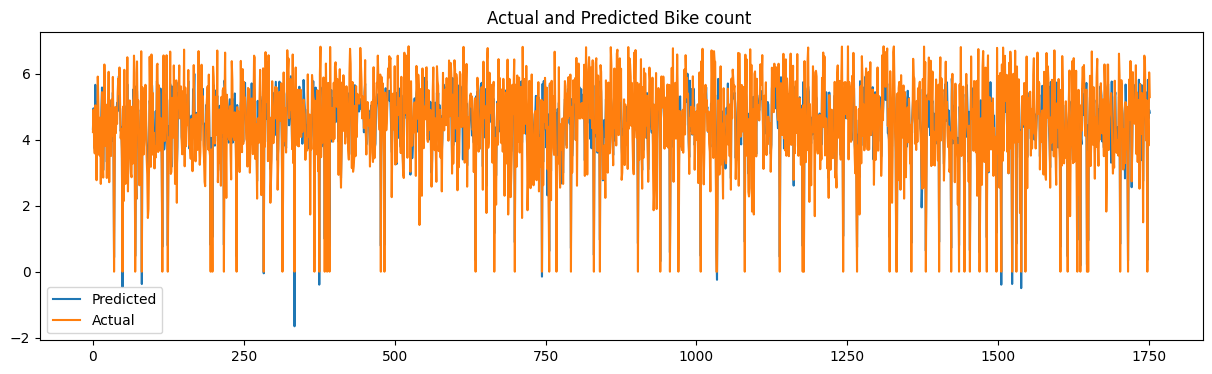

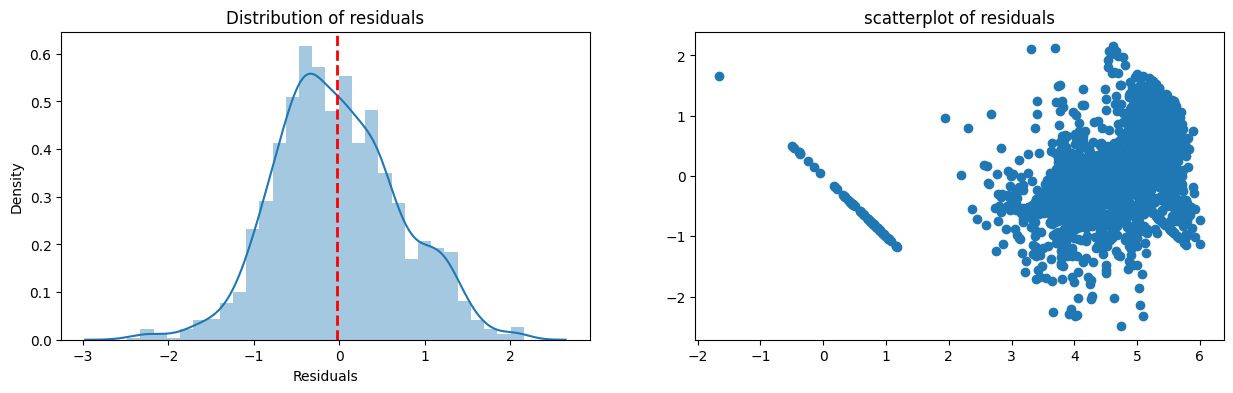

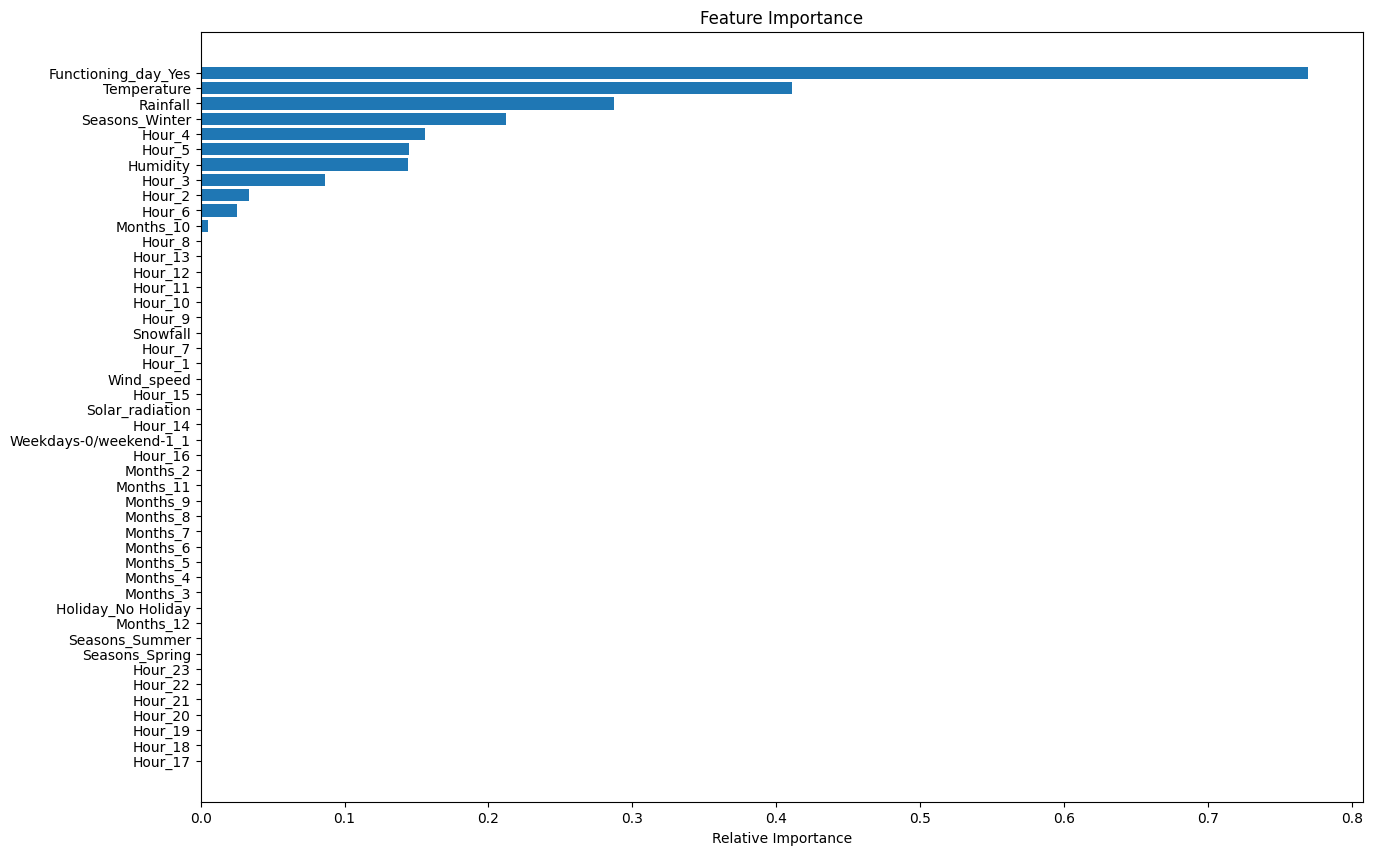

In [180]:
# graphical representation of action and predicted value and error.
graph_rep(lasso,x_train,x_test,y_train,y_test)

* **Model** : Lasso Regression

* **R2 score** of Train data : 0.737249
* **Adjusted R2 score** of Train data : 0.749838

* **R2 score** of Test data : 0.751480
* **Adjusted R2 score** of Test data : 0.744775

* **Performance of data** : Working good in both Train and Test datasets.

* **Important features** : Functioing_day_Yes, Temperature, Rainfall, Seasons_Winter, Hour 4, 5

* **Mean of residual** : 0

* There are **no clear signs of overfitting**, as the model performs well on the test set.

#### 2. Cross- Validation & Hyperparameter Tuning

In [181]:
# using GridSearchCV for improving model performance
parameters = {'alpha' : [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_GS = GridSearchCV(lasso,parameters,scoring = 'neg_mean_squared_error', cv = 5)

lasso_GS.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.1),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [182]:
# To find best value of alpha
print("The best fit alpha value is found out to be :" ,lasso_GS.best_params_)
print("\nUsing ",lasso_GS.best_params_, " the negative mean squared error is: ", lasso_GS.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.3727518033483198


In [183]:
# # get the new value of matrics for train and test datasets
LASSOCV = mat_eval(lasso_GS,x_train,x_test,y_train,y_test)
LASSOCV

Model       MSE  \
Training set 0  GridSearchCV(cv=5, estimator=Lasso(alpha=0.1),...  0.367384   
Test set     0  GridSearchCV(cv=5, estimator=Lasso(alpha=0.1),...  0.361536   

                    RMSE        R2  Adjusted R2  
Training set 0  0.606122  0.817256     0.829570  
Test set     0  0.601279  0.830689     0.826121

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [184]:
# concate two df Lasso and LassoCV for compairsion
l_score = pd.concat([LASSO,LASSOCV], keys = ['Lasso', 'Lasso with GridSearchCV']).drop(columns = 'Model')
l_score

MSE      RMSE        R2  \
Lasso                   Training set 0  0.528226  0.726792  0.737249   
                        Test set     0  0.530675  0.728474  0.751480   
Lasso with GridSearchCV Training set 0  0.367384  0.606122  0.817256   
                        Test set     0  0.361536  0.601279  0.830689   

                                        Adjusted R2  
Lasso                   Training set 0     0.749838  
                        Test set     0     0.744775  
Lasso with GridSearchCV Training set 0     0.829570  
                        Test set     0     0.826121

* **Lasso model with GridSearchCV performing well compare to base Lasso model**.

* The Lasso model with GridSearch slightly **improved the performance compared to the base Lasso model**.

* It **achieved higher R2 scores** on both the training and test sets, with values of approximately **0.82 for the training set and 0.83 for the test set**.

* The **adjusted R2 scores also improved**, indicating that the additional regularization parameter tuning helped in **better model performance**.

* The **MSE and RMSE values are lower** compared to the base Lasso model, indicating **improved prediction accuracy**.

### **Ridge Regression**

In [185]:
# create a class of Ridge regression
ridge = Ridge(alpha = 0.1).fit(x_train,y_train)

In [186]:
# get the score, intercept and coeff value
model_score_inter_coef(ridge, x_train, y_train)

Score:  0.8172915828558627
Intercept:  4.532386287091306
coefficient:  [ 0.47566957 -0.19136943 -0.01577586 -0.01764548 -0.38332871 -0.02601983
 -0.05055597 -0.11994798 -0.16793892 -0.24219886 -0.23070686 -0.10552568
  0.02522012  0.10402969  0.05310966 -0.03026019 -0.0211494   0.00749138
  0.00489884  0.00514474  0.01472799  0.03385816  0.07509938  0.04634612
  0.05556871  0.05898041  0.09537999  0.08712138  0.02251976  0.02119936
  0.01197355 -0.23977215  0.0657947   0.90404547 -0.00643315 -0.03713807
  0.01389748  0.05678894  0.05614851 -0.01206438 -0.0246982   0.06823057
  0.14840192  0.10326018  0.06462542  0.0051322 ]


(None, None, None)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [187]:
# get the value of matrics for train and test datasets
RIDGE = mat_eval(ridge,x_train,x_test,y_train,y_test)
RIDGE

Model       MSE      RMSE        R2  Adjusted R2
Training set 0  Ridge(alpha=0.1)  0.367312  0.606062  0.817292     0.829501
Test set     0  Ridge(alpha=0.1)  0.361683  0.601401  0.830621     0.826051

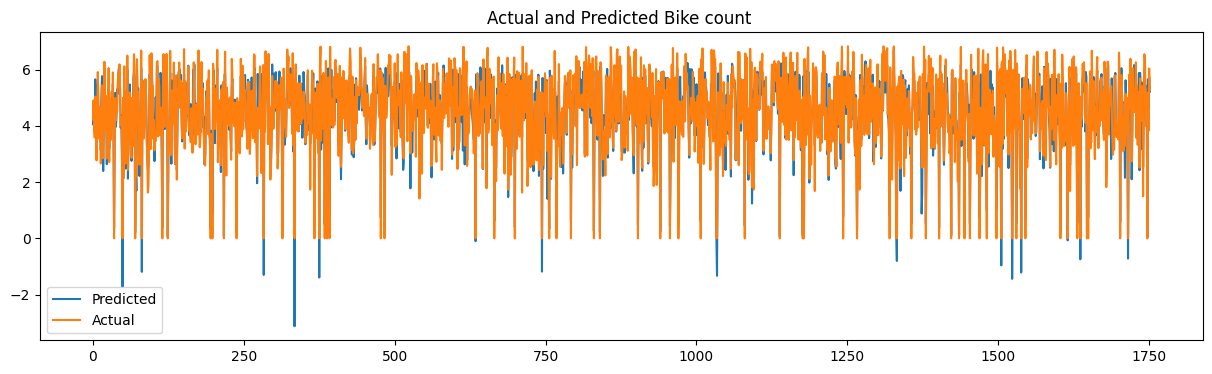

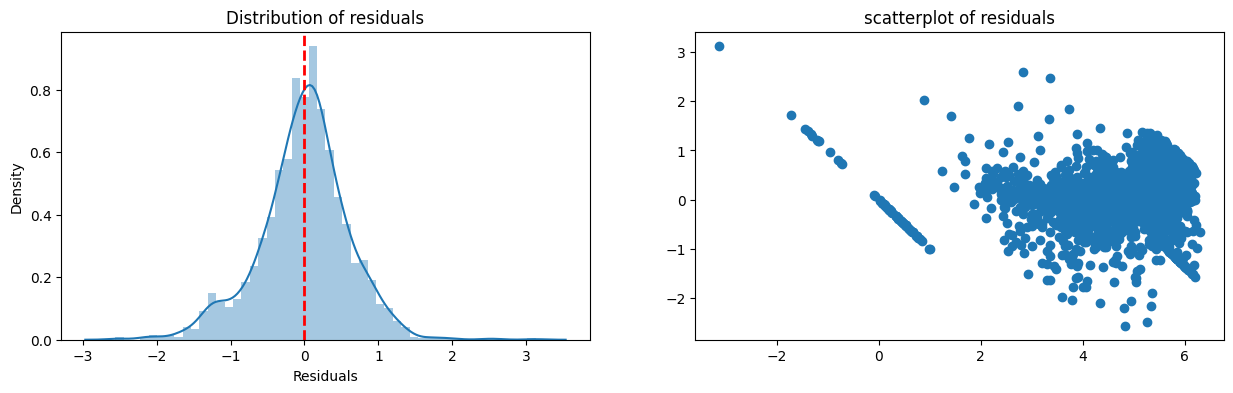

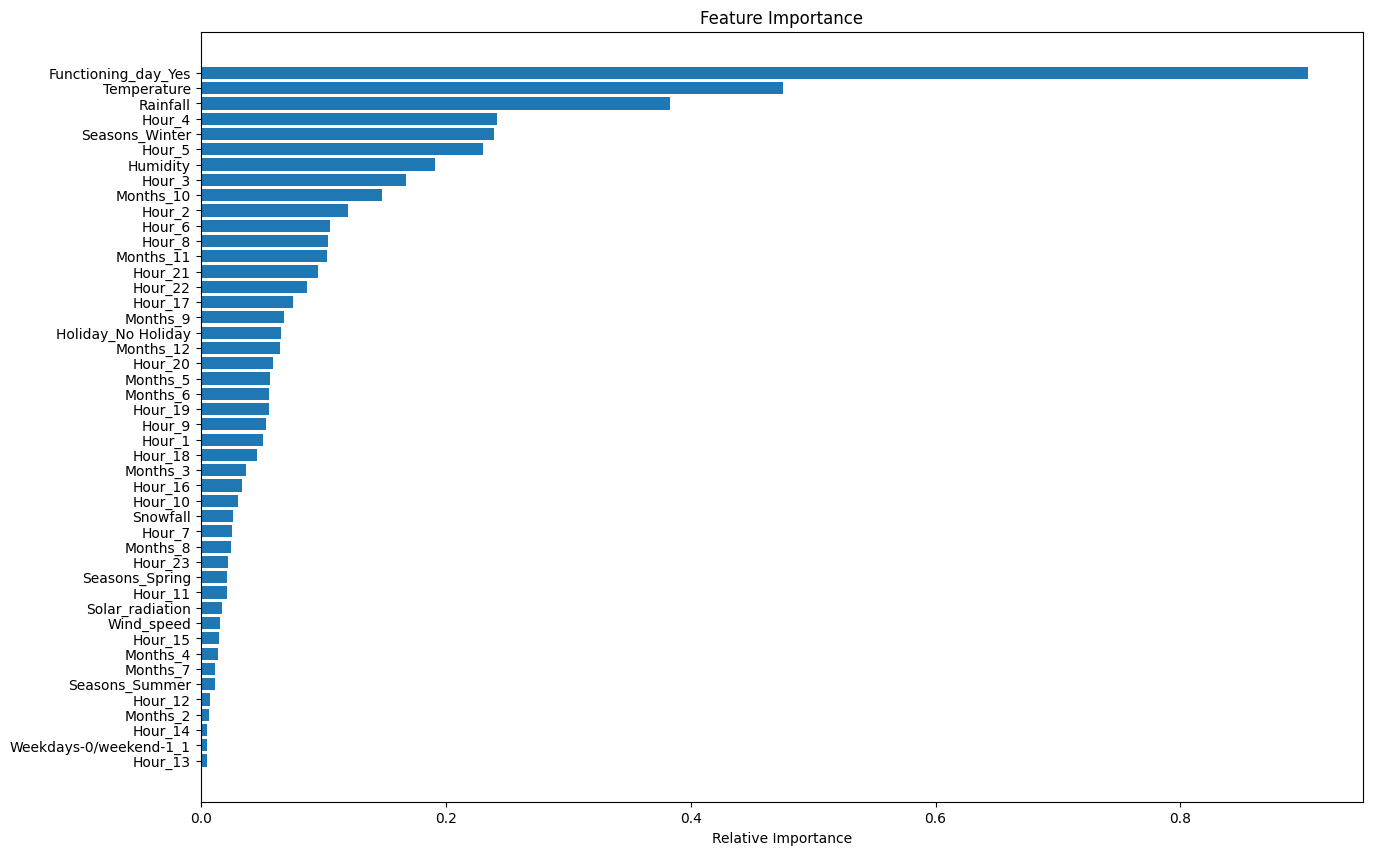

In [188]:
# graphical representation of action and predicted value and error.
graph_rep(ridge,x_train,x_test,y_train,y_test)

* **Model** : Ridge Regression

* **R2 score** of Train data : 0.817292
* **Adjusted R2 score** of Train data : 0.829509

* **R2 score** of Test data :0.830621
* **Adjusted R2 score** of Test data : 0.826051

* **Performance of data** : Working good in both Train and Test datasets.

* **Important features** : Functioing_day_Yes, Temperature, Rainfall, Seasons_Winter, Hour 4, 5.

* **Mean of residual** : 0

* There are **no clear signs of overfitting**, as the model performs well on the test set and shows **similar R2 and adjusted R2 scores for both training and test sets**.

#### 2. Cross- Validation & Hyperparameter Tuning

In [189]:
# using GridSearchCV to improve model performance
parameters = {'alpha' : [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_GS = GridSearchCV(ridge,parameters,scoring = 'neg_mean_squared_error', cv = 3)

ridge_GS.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(alpha=0.1),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [190]:
# To find best value of alpha
print("The best fit alpha value is found out to be :" ,ridge_GS.best_params_)
print("\nUsing ",ridge_GS.best_params_, " the negative mean squared error is: ", ridge_GS.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -0.3720707592903058


In [191]:
# get the new value of matrics for train and test datasets
RIDGECV = mat_eval(ridge_GS,x_train,x_test,y_train,y_test)
RIDGECV

Model       MSE  \
Training set 0  GridSearchCV(cv=3, estimator=Ridge(alpha=0.1),...  0.367313   
Test set     0  GridSearchCV(cv=3, estimator=Ridge(alpha=0.1),...  0.361692   

                    RMSE        R2  Adjusted R2  
Training set 0  0.606063  0.817291     0.829497  
Test set     0  0.601408  0.830616     0.826047

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [192]:
# concate two df Ridge and RidgeCV for compairsion
r_score = pd.concat([RIDGE,RIDGECV], keys = ['Ridge', 'Ridge with GridSearch']).drop(columns = 'Model')
r_score

MSE      RMSE        R2  \
Ridge                 Training set 0  0.367312  0.606062  0.817292   
                      Test set     0  0.361683  0.601401  0.830621   
Ridge with GridSearch Training set 0  0.367313  0.606063  0.817291   
                      Test set     0  0.361692  0.601408  0.830616   

                                      Adjusted R2  
Ridge                 Training set 0     0.829501  
                      Test set     0     0.826051  
Ridge with GridSearch Training set 0     0.829497  
                      Test set     0     0.826047

* The Ridge model with GridSearch **shows similar performance** to the base Ridge model.              

* The MSE, RMSE, R2, and adjusted R2 scores are almost identical for both the training and test sets.

* GridSearch **did not significantly improve the model's performance** in this case.

* Both the Ridge model and the Ridge model with GridSearch **demonstrate reasonable predictive performance**.

### **ElasticNet Regression**

In [193]:
# create a class of ElasticNet Regression
en_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.5).fit(x_train,y_train)

In [194]:
# get the score, intercept and coeff value
model_score_inter_coef(en_reg, x_train, y_train)

Score:  0.7776823974758135
Intercept:  4.532386287091306
coefficient:  [ 0.39154173 -0.16335245  0.          0.         -0.31843757 -0.
 -0.01446413 -0.08188598 -0.13087316 -0.19843141 -0.18784909 -0.0724884
  0.          0.03574477  0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.01755096  0.
  0.          0.00215677  0.03614158  0.02838506  0.         -0.
  0.         -0.26455683  0.0118416   0.78809748 -0.00550161 -0.02033711
 -0.          0.          0.00142502 -0.         -0.          0.
  0.04493255  0.          0.          0.        ]


(None, None, None)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [195]:
# # get the value of matrics for train and test datasets
ELASTICNET = mat_eval(en_reg,x_train,x_test,y_train,y_test)
ELASTICNET

Model       MSE      RMSE        R2  \
Training set 0  ElasticNet(alpha=0.1)  0.446941  0.668536  0.777682   
Test set     0  ElasticNet(alpha=0.1)  0.446234  0.668008  0.791024   

                Adjusted R2  
Training set 0     0.789644  
Test set     0     0.785386

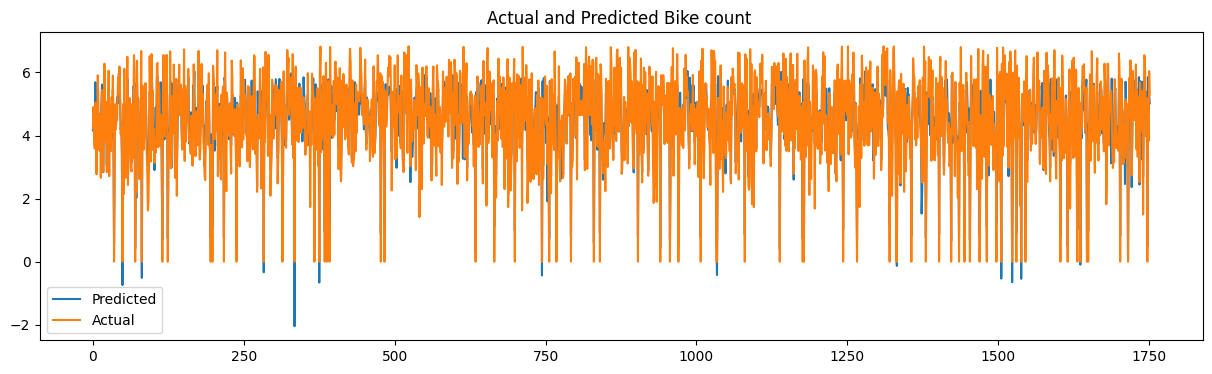

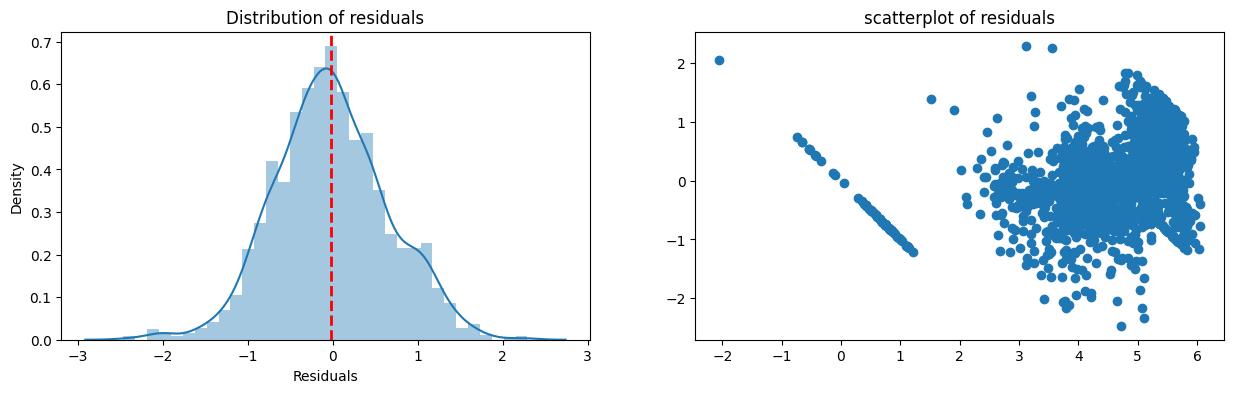

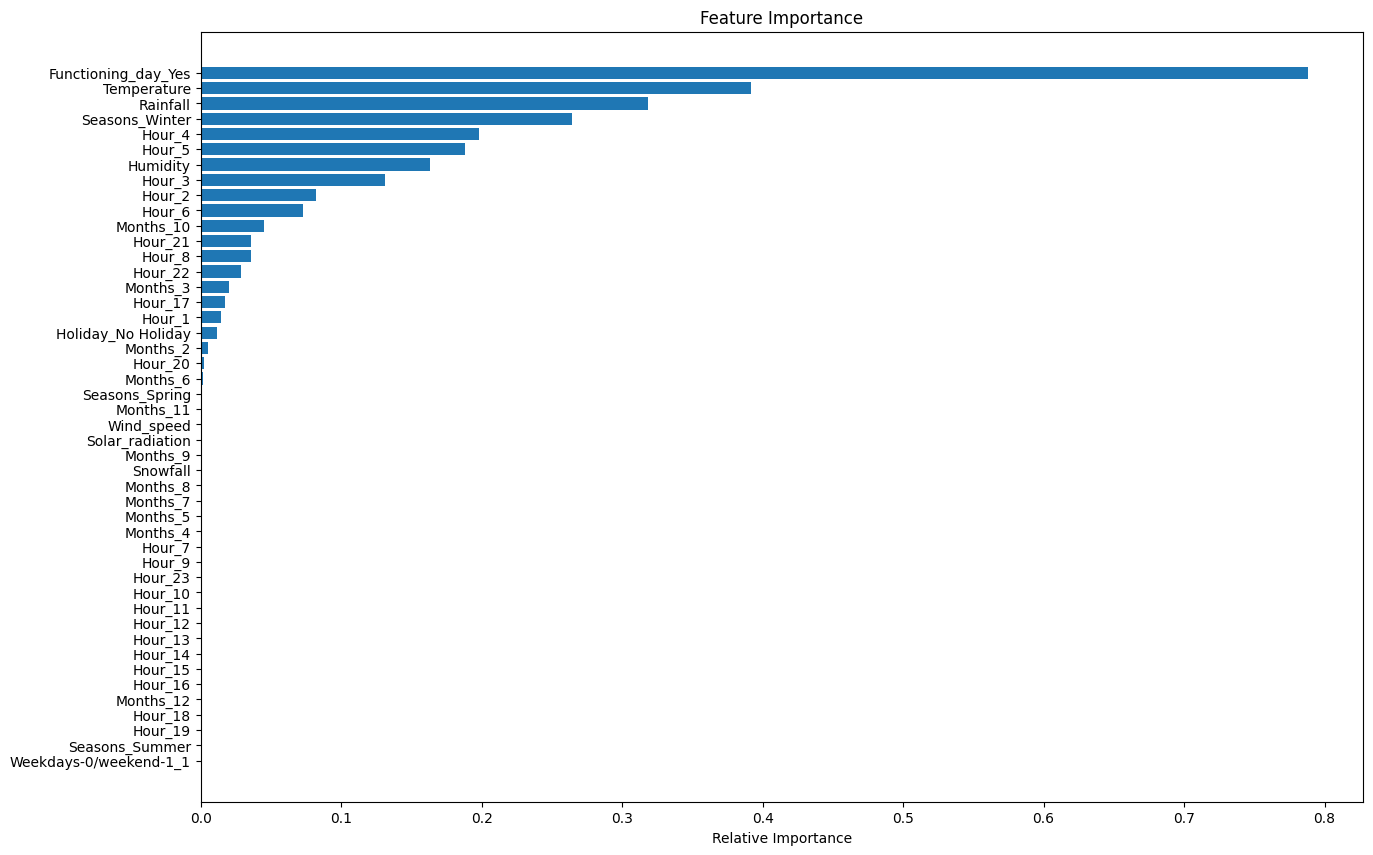

In [196]:
# graphical representation of action and predicted value and error.
graph_rep(en_reg,x_train,x_test,y_train,y_test)

* **Model** : ElasticNet Regression

* **R2 score** of Train data : 0.777682

* **Adjusted R2** score of Train data : 0.789644

* **R2 score** of Test data : 0.791024

* **Adjusted R2 score** of Test data : 0.785386

* Performance of data : Working good in both Train and Test datasets.

* **Important features** : Functioing_day_Yes, Temperature, Rainfall, Seasons_Winter, Hour 4, 5.

* **Mean of residual** : 0

* There are **no clear signs of overfitting**, as the model performs well on the test set.

#### 2. Cross- Validation & Hyperparameter Tuning

In [197]:
# # using GridSearchCV to improve model performance
parameters = {'alpha' : [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100], 'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
en_reg_GS = GridSearchCV(en_reg,parameters,scoring = 'neg_mean_squared_error', cv = 3)

en_reg_GS.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(alpha=0.1),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [198]:
# To find best value of alpha
print("The best fit alpha value is found out to be :" ,en_reg_GS.best_params_)
print("\nUsing ",en_reg_GS.best_params_, " the negative mean squared error is: ", ridge_GS.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.8}

Using  {'alpha': 0.001, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.3720707592903058


In [199]:
#  get the new value of matrics for train and test datasets
ELASTICNETCV = mat_eval(en_reg_GS,x_train,x_test,y_train,y_test)
ELASTICNETCV

Model       MSE  \
Training set 0  GridSearchCV(cv=3, estimator=ElasticNet(alpha=...  0.367365   
Test set     0  GridSearchCV(cv=3, estimator=ElasticNet(alpha=...  0.361520   

                    RMSE        R2  Adjusted R2  
Training set 0  0.606106  0.817265     0.829578  
Test set     0  0.601266  0.830697     0.826129

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [200]:
# # concate two df LELASTICNET and ELASTICNETCV for compairsion
en_score = pd.concat([ELASTICNET,ELASTICNETCV], keys = ['ElasticNet', 'ElasticNet with GridSearch']).drop(columns = 'Model')
en_score

MSE      RMSE        R2  \
ElasticNet                 Training set 0  0.446941  0.668536  0.777682   
                           Test set     0  0.446234  0.668008  0.791024   
ElasticNet with GridSearch Training set 0  0.367365  0.606106  0.817265   
                           Test set     0  0.361520  0.601266  0.830697   

                                           Adjusted R2  
ElasticNet                 Training set 0     0.789644  
                           Test set     0     0.785386  
ElasticNet with GridSearch Training set 0     0.829578  
                           Test set     0     0.826129

* The ElasticNet model with GridSearch exhibits **improved performance compared to the base ElasticNet model**.

* The **MSE and RMSE values are lower**, indicating **better predictive accuracy** on both the training and test sets.

* **The R2 and adjusted R2 scores also show improvement**, suggesting that approximately **81.7%** of the variance in the **training set** and **83.1%** in the **test set** an be explained by the model.

* The performance of the model is consistent between the training and test sets, **indicating good generalization**.

### **RANDOM FOREST**

In [201]:
# create a class of Random Forest
ran_for = RandomForestRegressor().fit(x_train,y_train)
ran_for.score(x_train,y_train)

0.9843535868892574

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [202]:
# get the value of matrics for train and test datasets
RANDOMFOREST = mat_eval(ran_for,x_train,x_test,y_train,y_test)
RANDOMFOREST

Model       MSE  \
Training set 0  (DecisionTreeRegressor(max_features=1.0, rando...  0.031455   
Test set     0  (DecisionTreeRegressor(max_features=1.0, rando...  0.223788   

                    RMSE        R2  Adjusted R2  
Training set 0  0.177356  0.984354     0.894506  
Test set     0  0.473062  0.895198     0.892371

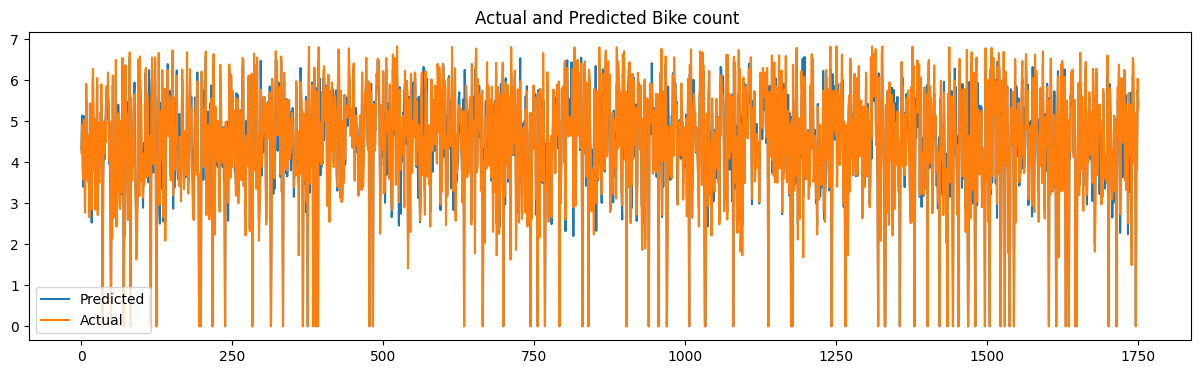

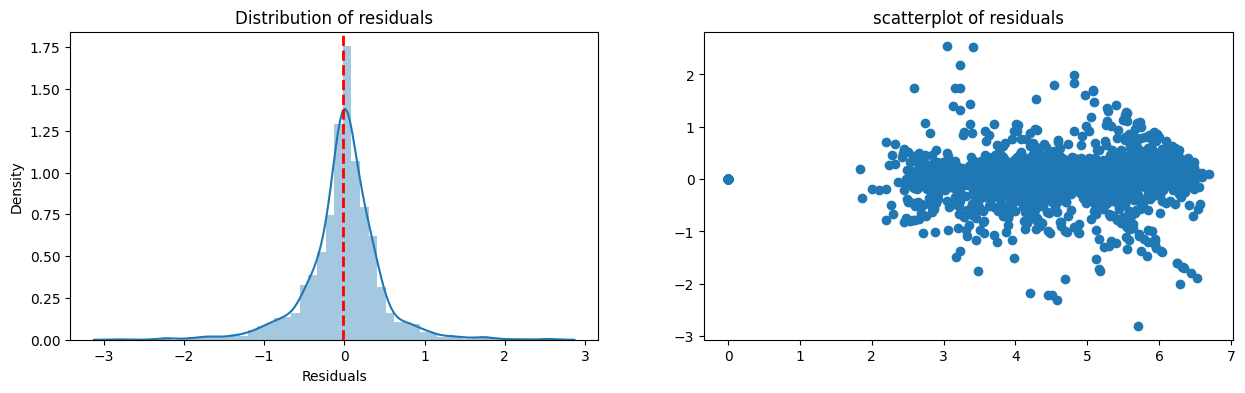

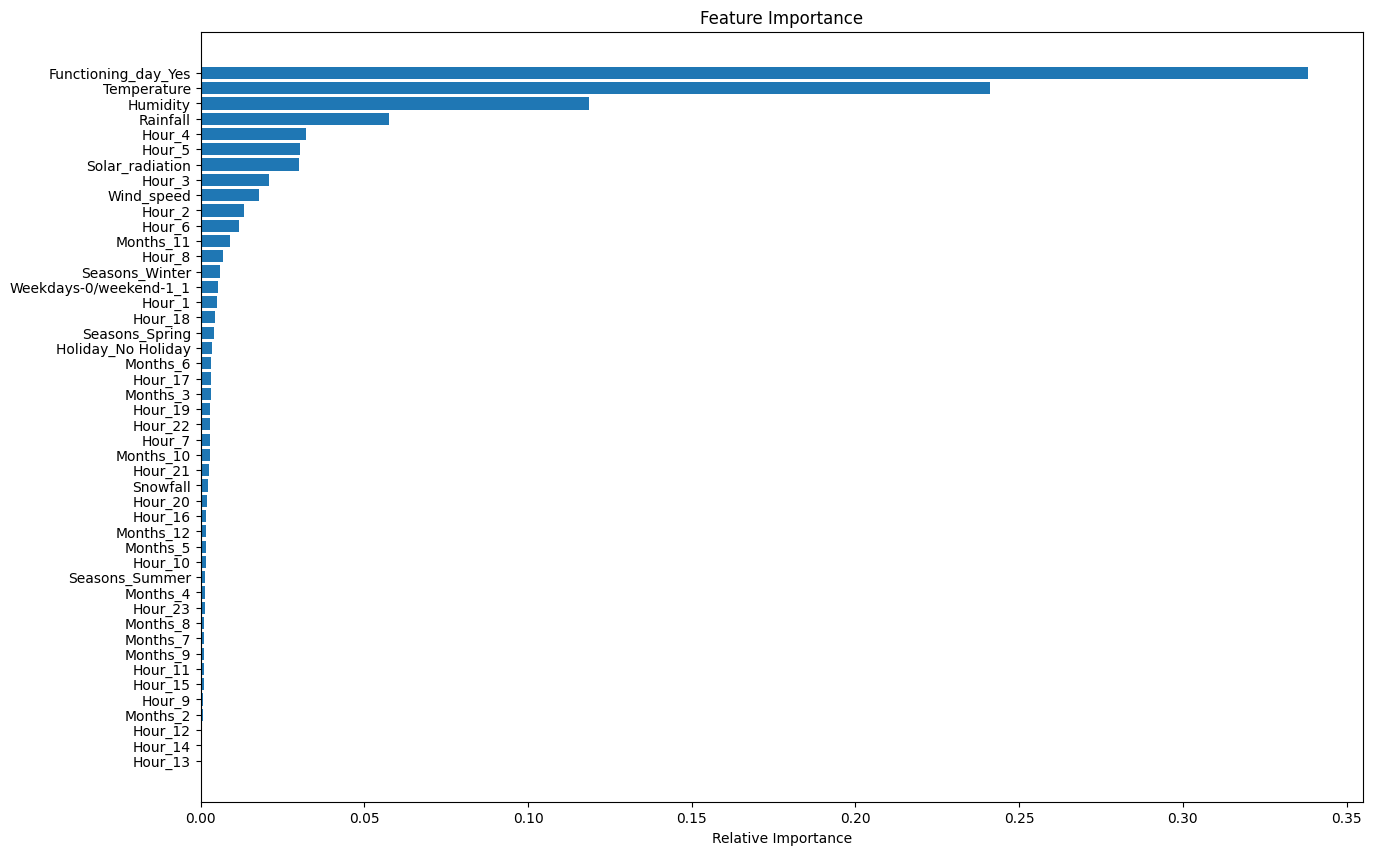

In [203]:
# graphical representation of action and predicted value and error.
graph_rep(ran_for,x_train,x_test,y_train,y_test)

* **Model** : Random Forest

* **R2 score** of Train data : 0.984719

* **Adjusted R2 score** of Train data : 0.893762

* **R2 score** of Test data :0.894460

* **Adjusted R2 score** of Test data : 0.891612

* **Performance of data** : Working good in both Train and Test datasets.

* **Important features** : Functioing_day_Yes, Temperature, Humidity, Rainfall, Hour 4, 5.

* **Mean of residual** : 0

* There are **no clear signs of overfitting**, as the model performs well on the test set and shows similar R2 and adjusted R2 scores for both training and test sets.

#### 2. Cross- Validation & Hyperparameter Tuning

In [204]:
# using GridSearchCV to improve model performance
parameters = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)],
             'max_depth' : [10,15,20],
             'min_samples_split':[2,4],
             'min_samples_leaf':[1,2],
             'bootstrap' : [True,False]
             }

ran_forCV = GridSearchCV(ran_for,parameters,scoring='r2',cv=3)
ran_forCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 12, 15, 17, 20]},
             scoring='r2')

In [205]:
# get the new value of matrics for train and test datasets
RAMDOMFORESTCV = mat_eval(ran_forCV,x_train,x_test,y_train,y_test)
RAMDOMFORESTCV

Model       MSE  \
Training set 0  GridSearchCV(cv=3, estimator=RandomForestRegre...  0.111545   
Test set     0  GridSearchCV(cv=3, estimator=RandomForestRegre...  0.242470   

                    RMSE        R2  Adjusted R2  
Training set 0  0.333983  0.944515     0.885698  
Test set     0  0.492413  0.886449     0.883385

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [206]:
# # concate two df RANDOMFOREST and RANDOMFORESTCV for compairsion
rf_score = pd.concat([RANDOMFOREST, RAMDOMFORESTCV], keys = ['RandomForest', 'RandomForest with GridSearch']).drop(columns = 'Model')
rf_score

MSE      RMSE        R2  \
RandomForest                 Training set 0  0.031455  0.177356  0.984354   
                             Test set     0  0.223788  0.473062  0.895198   
RandomForest with GridSearch Training set 0  0.111545  0.333983  0.944515   
                             Test set     0  0.242470  0.492413  0.886449   

                                             Adjusted R2  
RandomForest                 Training set 0     0.894506  
                             Test set     0     0.892371  
RandomForest with GridSearch Training set 0     0.885698  
                             Test set     0     0.883385

* **The RandomForest model shows strong performance compare to RandomForest model with GridSearch** on the training set with low MSE and RMSE values, indicating a good fit to the data.

* The RandomForest model with GridSearch hyperparameter optimization shows **slightly degraded performance compared to the base model**.

* While the training set performance is still good with a high R2 score of 0.9439 and adjusted R2 score of 0.8838, the test set results show a slight decrease in R2 and adjusted R2 scores.

* **The base RandomForest model performs slightly better overall**, but the difference in performance between the two models is relatively small.

### **Model Explainability by SHAP**

In [207]:
#Installing the shap library
!pip install shap

In [208]:
# Importing SHAP libarey
import shap
shap.initjs()

100%|===================| 7004/7008 [08:32<00:00]       

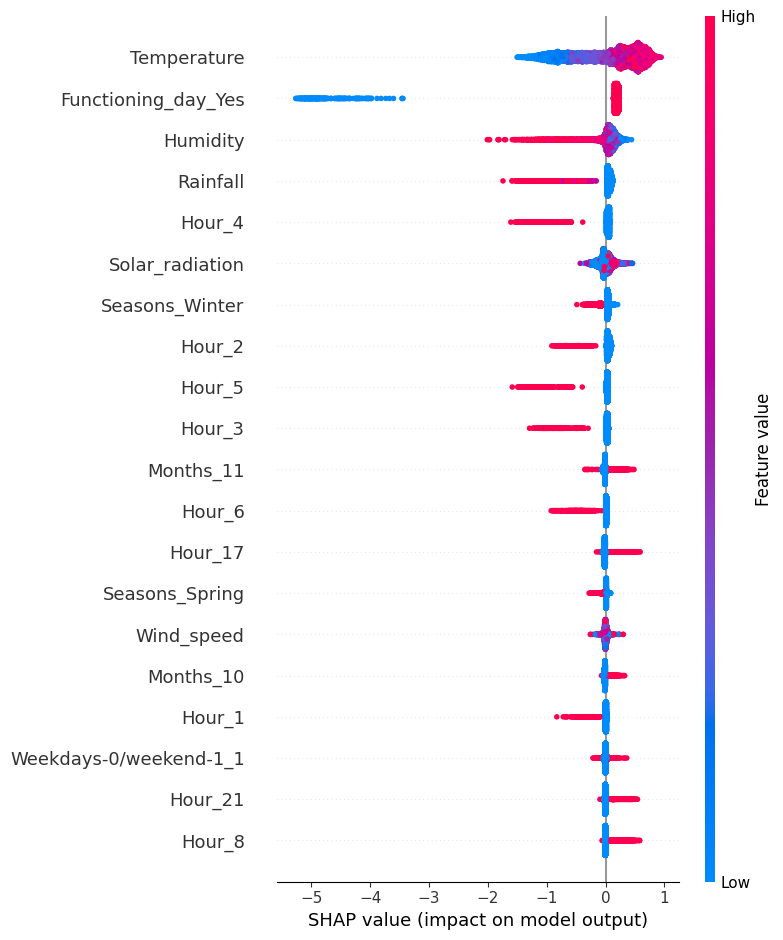

In [209]:
# Initialize the SHAP explainer
explainer_shap = shap.Explainer(model=ran_for, masker=x_train)

# Calculate SHAP values for the entire dataset
shap_values = explainer_shap.shap_values(x_train,check_additivity=False)

# shap summary plot
shap.summary_plot(shap_values,x_train,feature_names=x.columns)

# **Conclusion**

<font size = 5> **<font color = 'red'> <u> EDA Insight:** </u>

<font size = 4> **<font color = 'blue'> Distribution Wise :**

* **Right Skewed :** Rainfall, Snowfall and Solar_radiation
* **Left skewed :** Visibility
* **Normal :** Temperature and Humidity

<font size = 4> **<font color = 'blue'> Rental Bike Pattern :**

* Bike rentals are highest when the **temperature ranges between 25-30 degrees Celsius**.

* The number of **bike rentals decreases as humidity increases**.

* **Bike demand** remains relatively stable across different wind speeds, but there is a **slight increase at 7 m/s.**

* **Rainfall has a limited impact** on bike rentals, while **heavy snow negatively affects demand**.

<font size = 4> **<font color = 'blue'> Correlation with dependent variable :**

* **Positive Correlation :** Temperature, Dew_point_temperature and solar_radiation.
* **Negative correlation :** Humidity, Rainfall and snowfall.

<font size = 4> **<font color = 'blue'> Time and Seasonal Patterns:**

* The highest bike rentals occur **during working hours**, from 7 am to 9 am and 5 pm to 7 pm.

* **Summer has the highest bike rental demand**, followed by Autumn.

* Bike rentals significantly decrease during **holidays and non-functioning days.**

* Bike rentals are highest from May to October and lowest in December, January, and February.

* **Weekdays have significantly higher bike rentals** compared to weekends.

<font size = 5> **<font color = 'red'> <u> ML Models:** </u>

In [210]:
resultdf = pd.concat([LINEAR,LASSO,LASSOCV,RIDGE,RIDGECV,ELASTICNET,ELASTICNETCV,RANDOMFOREST,RAMDOMFORESTCV], keys =['Linear Regression', 'Lasso Regression', 'Lasso with GridSearchCV',
                                                                                                                      'Ridge regression','Ridge with GridSearchCV', 'ElasticNet',
                                                                                                                     'ElasticNet with GridSearchCV', 'Random Forest',
                                                                                                                     'Random Forest with GridSearchCV'])
resultdf.drop(columns = 'Model',inplace = True)
resultdf

MSE      RMSE        R2  \
Linear Regression               Training set 0  0.367311  0.606062  0.817292   
                                Test set     0  0.361667  0.601388  0.830628   
Lasso Regression                Training set 0  0.528226  0.726792  0.737249   
                                Test set     0  0.530675  0.728474  0.751480   
Lasso with GridSearchCV         Training set 0  0.367384  0.606122  0.817256   
                                Test set     0  0.361536  0.601279  0.830689   
Ridge regression                Training set 0  0.367312  0.606062  0.817292   
                                Test set     0  0.361683  0.601401  0.830621   
Ridge with GridSearchCV         Training set 0  0.367313  0.606063  0.817291   
                                Test set     0  0.361692  0.601408  0.830616   
ElasticNet                      Training set 0  0.446941  0.668536  0.777682   
                                Test set     0  0.446234  0.668008  0.791024   
ElasticNet with GridSearchCV    Training set 0  0.367365  0.606106  0.817265   
                                Test set     0  0.361520  0.601266  0.830697   
Random Forest                   Training set 0  0.031455  0.177356  0.984354   
                                Test set     0  0.223788  0.473062  0.895198   
Random Forest with GridSearchCV Training set 0  0.111545  0.333983  0.944515   
                                Test set     0  0.242470  0.492413  0.886449   

                                                Adjusted R2  
Linear Regression               Training set 0     0.829509  
                                Test set     0     0.826058  
Lasso Regression                Training set 0     0.749838  
                                Test set     0     0.744775  
Lasso with GridSearchCV         Training set 0     0.829570  
                                Test set     0     0.826121  
Ridge regression                Training set 0     0.829501  
                                Test set     0     0.826051  
Ridge with GridSearchCV         Training set 0     0.829497  
                                Test set     0     0.826047  
ElasticNet                      Training set 0     0.789644  
                                Test set     0     0.785386  
ElasticNet with GridSearchCV    Training set 0     0.829578  
                                Test set     0     0.826129  
Random Forest                   Training set 0     0.894506  
                                Test set     0     0.892371  
Random Forest with GridSearchCV Training set 0     0.885698  
                                Test set     0     0.883385

* Among the evaluated models, the **RandomForest and RandomForest with GridSearchCV model** shows the best performance with **lower MSE and RMSE values, higher R2 values, and high Adjusted R2 values** on both the training and test sets.

* It outperforms the **ElasticNet, Ridge, and Lasso models**, which **exhibit slightly higher errors and lower R2 values**.

* **No sign of overfitting seen**.

* Therefore, the **RandomForest model and RandomForest with GridSearchCV is recommended** as the top choice for this regression task.

* **Important features** : Functioing_day_Yes, Temperature, Humidity, Rainfall, Hour 4, 5.